## Creating Cohorts of Songs

 #### By Tara Danneman

Problem Statement:
In a bid to improve song recommendations for its users, Spotify seeks to create distinct groups, or cohorts, of songs based on various features. By clustering songs into cohorts with similar characteristics, Spotify aims to enhance user engagement by delivering more relevant content tailored to individual preferences. This project involves exploratory data analysis and cluster analysis to identify patterns in song attributes and group them accordingly, thus improving the overall music recommendation experience for Spotify users.

### Step 1: Analyze and clean the data by:

A - Import necessary libraries for analytics.

B - Getting an idea of the columns, values, data types and descriptions by perfomring various methods from pandas. 
    
C - Checking for null values, duplicate values, irrelevant entries, or outliers.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Load the dataset
df = pd.read_csv("rolling_stones_spotify.csv")

In [3]:
# Displays the first few rows of the data set to help you get an idea of the data's structure.
df.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

In [4]:
df.shape

(1610, 18)

In [5]:
# Displays the numerical description of the data set. 
df.describe().T

count           mean            std           min  \
Unnamed: 0        1610.0     804.500000     464.911282      0.000000   
track_number      1610.0       8.613665       6.560220      1.000000   
acousticness      1610.0       0.250475       0.227397      0.000009   
danceability      1610.0       0.468860       0.141775      0.104000   
energy            1610.0       0.792352       0.179886      0.141000   
instrumentalness  1610.0       0.164170       0.276249      0.000000   
liveness          1610.0       0.491730       0.349100      0.021900   
loudness          1610.0      -6.971615       2.994003    -24.408000   
speechiness       1610.0       0.069512       0.051631      0.023200   
tempo             1610.0     126.082033      29.233483     46.525000   
valence           1610.0       0.582165       0.231253      0.000000   
popularity        1610.0      20.788199      12.426859      0.000000   
duration_ms       1610.0  257736.488199  108333.474920  21000.000000   

                            25%           50%           75%         max  
Unnamed: 0           402.250000     804.50000    1206.75000    1609.000  
track_number           4.000000       7.00000      11.00000      47.000  
acousticness           0.058350       0.18300       0.40375       0.994  
danceability           0.362250       0.45800       0.57800       0.887  
energy                 0.674000       0.84850       0.94500       0.999  
instrumentalness       0.000219       0.01375       0.17900       0.996  
liveness               0.153000       0.37950       0.89375       0.998  
loudness              -8.982500      -6.52300      -4.60875      -1.014  
speechiness            0.036500       0.05120       0.08660       0.624  
tempo                107.390750     124.40450     142.35575     216.304  
valence                0.404250       0.58300       0.77800       0.974  
popularity            13.000000      20.00000      27.00000      80.000  
duration_ms       190613.000000  243093.00000  295319.75000  981866.000

In [6]:
# Displays various information about the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [7]:
# Check for zeros
df[df==0].count()

Unnamed: 0           1
name                 0
album                0
release_date         0
track_number         0
id                   0
uri                  0
acousticness         0
danceability         0
energy               0
instrumentalness    95
liveness             0
loudness             0
speechiness          0
tempo                0
valence              1
popularity          17
duration_ms          0
dtype: int64

In [8]:
# Returns the number of unique values per column:
# Note that it makes sense how many unique columns there are, given the data set type, but this is useful as it tells you the variance in the data, including things like how many albums and songs there are, etc.
df.nunique()

Unnamed: 0          1610
name                 954
album                 90
release_date          57
track_number          47
id                  1610
uri                 1610
acousticness         933
danceability         518
energy               511
instrumentalness    1134
liveness             757
loudness            1329
speechiness          655
tempo               1424
valence              701
popularity            69
duration_ms         1320
dtype: int64

Observations: 

Given the numbers from the different functions above, you can see there are a total of 1,610 songs among 90 different albums in the data set. Since there are 17 '0' values for popularity, it means 17 of them are not popular at all. 

Five of the columns are categorical, which means they will need to be converted before being plotted in the next steps.

Among the columns, only 'Unnamed', 'id', and 'uri' have unique values for each song. This suggests that while each song may have similarities with others, they will be related in diverse ways, potentially indicating varying patterns or connections among the songs.

### Step 2: Refine the data for further processing

A - Check for missing values and handle any if needed.

B - Drop duplicates or unnecessary columns if needed. 
    
C - Convert categorical data into intergers for plotting using get_dummies. Other methods, such as label encoding, can be used if needed for varying types of analysis. 

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


Observation: There are no missing values so no next steps are needed to handle missing values. 

In [10]:
# Drop the duplicate values
df = df.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


Observation: The number of values is the same as before so this data set was clean; however, its a good exercise to do as no data set will be clean at a job.

In [11]:
df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [12]:
# Drop the Unnamed column as its irrelevant data for what is needed out of this project.
df = df.drop('Unnamed: 0', axis=1)

In [13]:
# Print columns to make sure the drop method worked
df.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

### Step 3: Perform data analysis and feature engineering

A. Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

B. Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

C. Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved

D. Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations


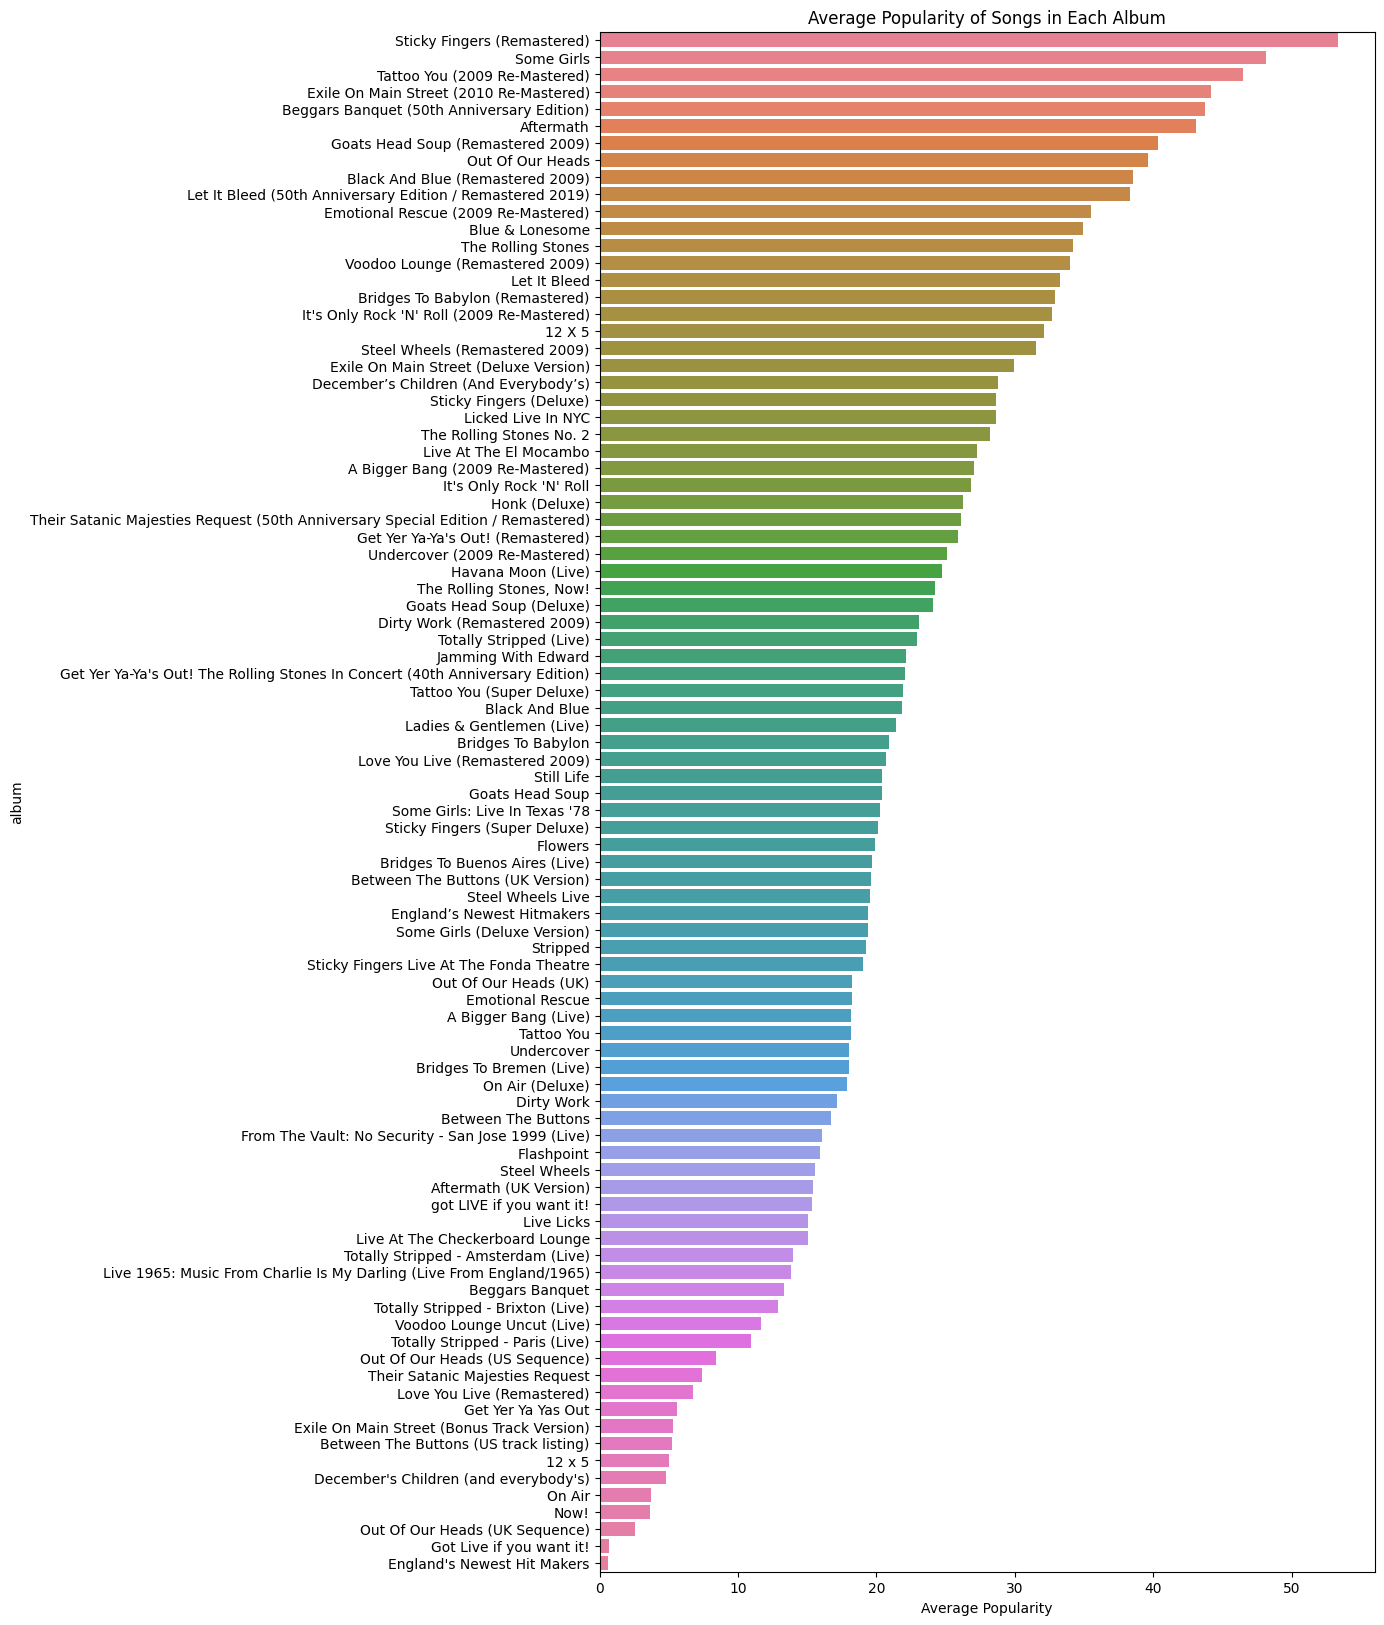

In [14]:
# Organizing the albums by which has the most popular songs

album_popularity = df.groupby('album')['popularity'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,20))
sns.barplot(x=album_popularity.values, y=album_popularity.index, hue=album_popularity.index, legend=False)
plt.xlabel('Average Popularity')
plt.title('Average Popularity of Songs in Each Album')
plt.show()

Observation for step A: Based on this analysis, the two albums with the most popular songs are 'Sticky Fingers (Remastered)' and 'Some Girls'

### Bivariate Analysis of popularity to other characteristics to see any correlation

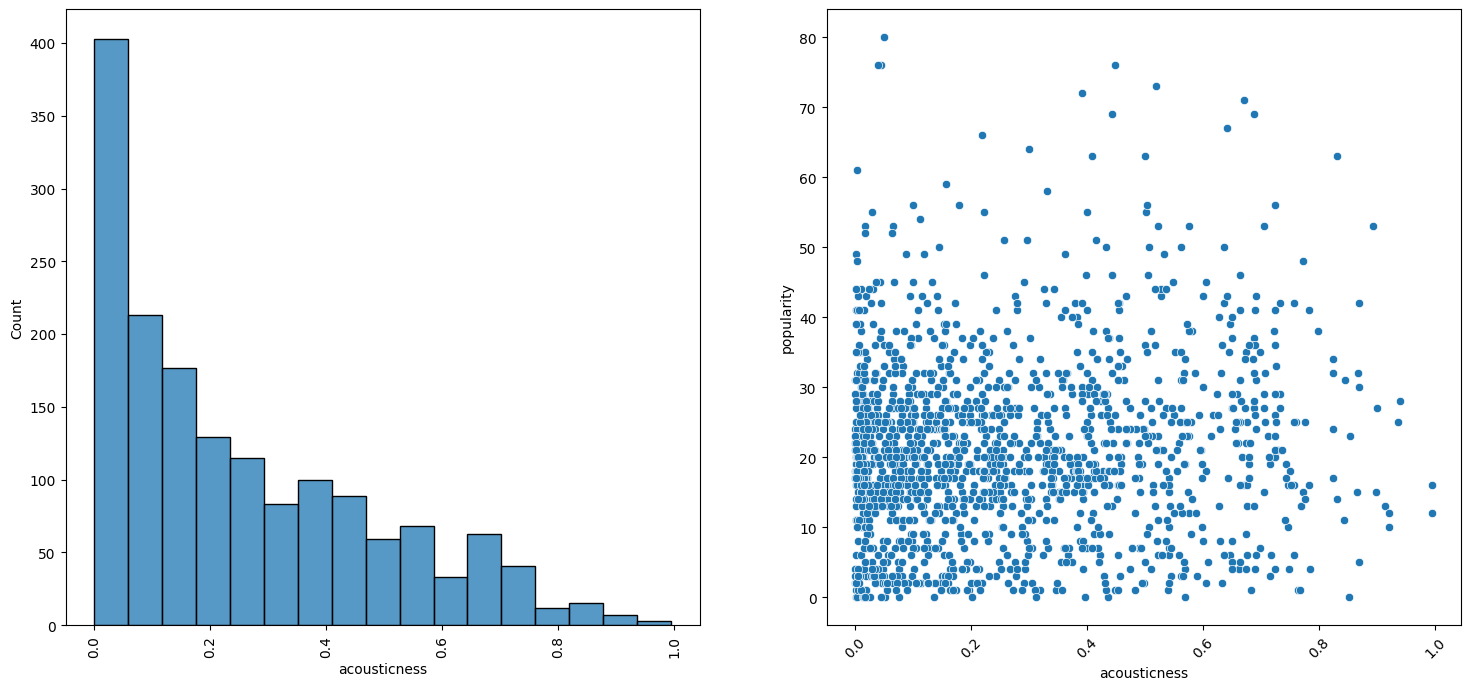

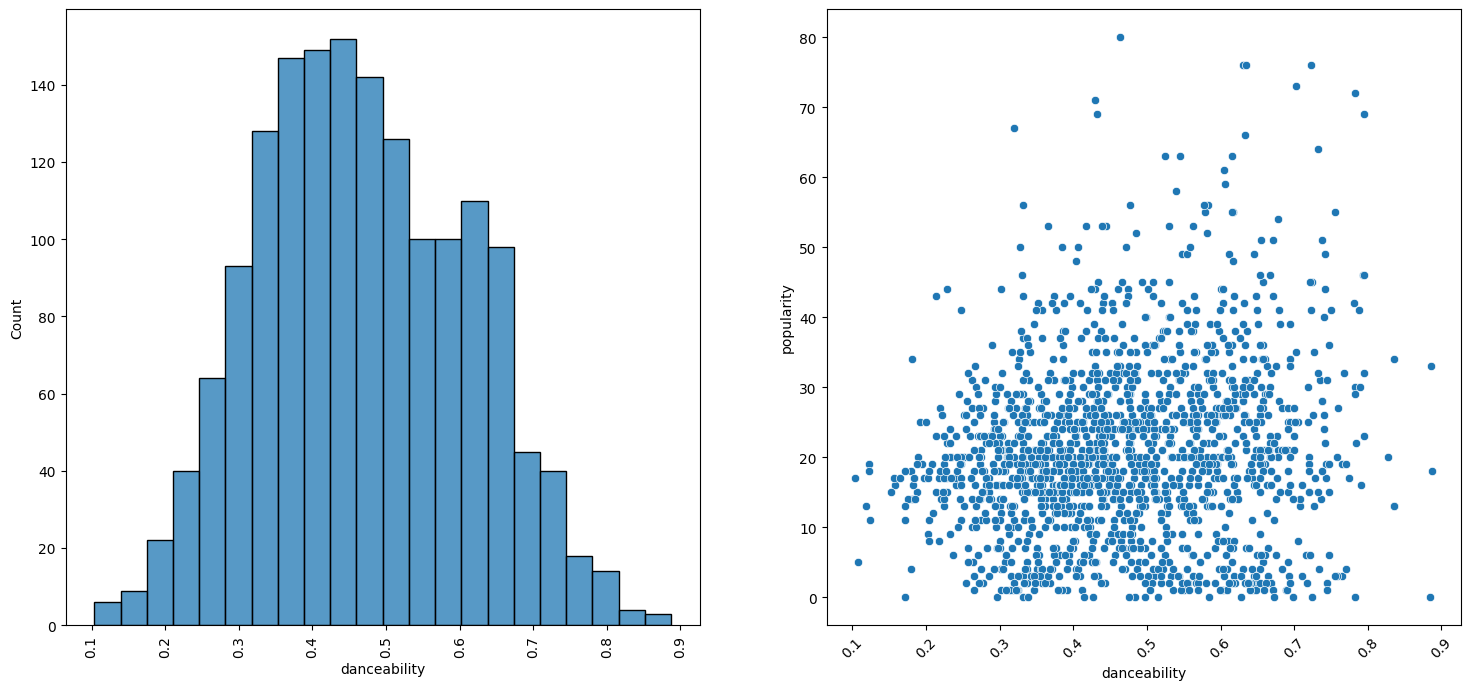

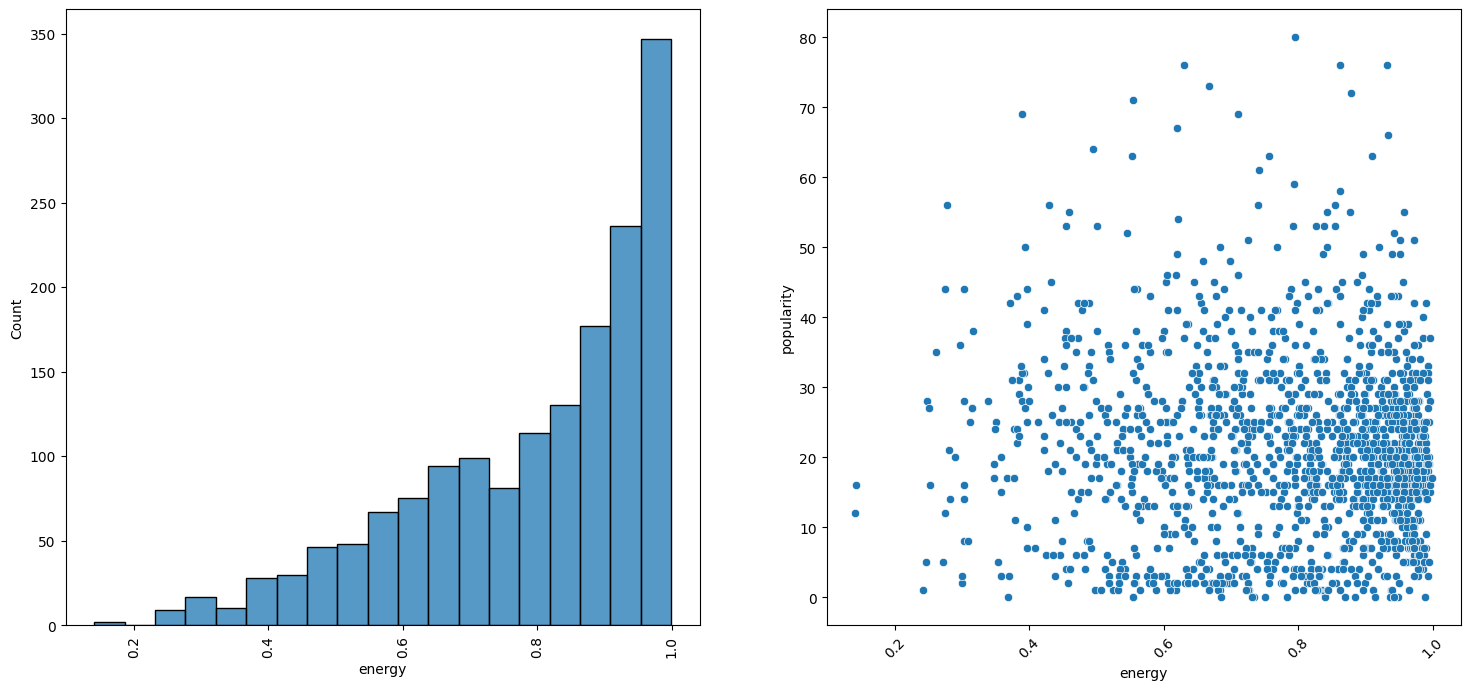

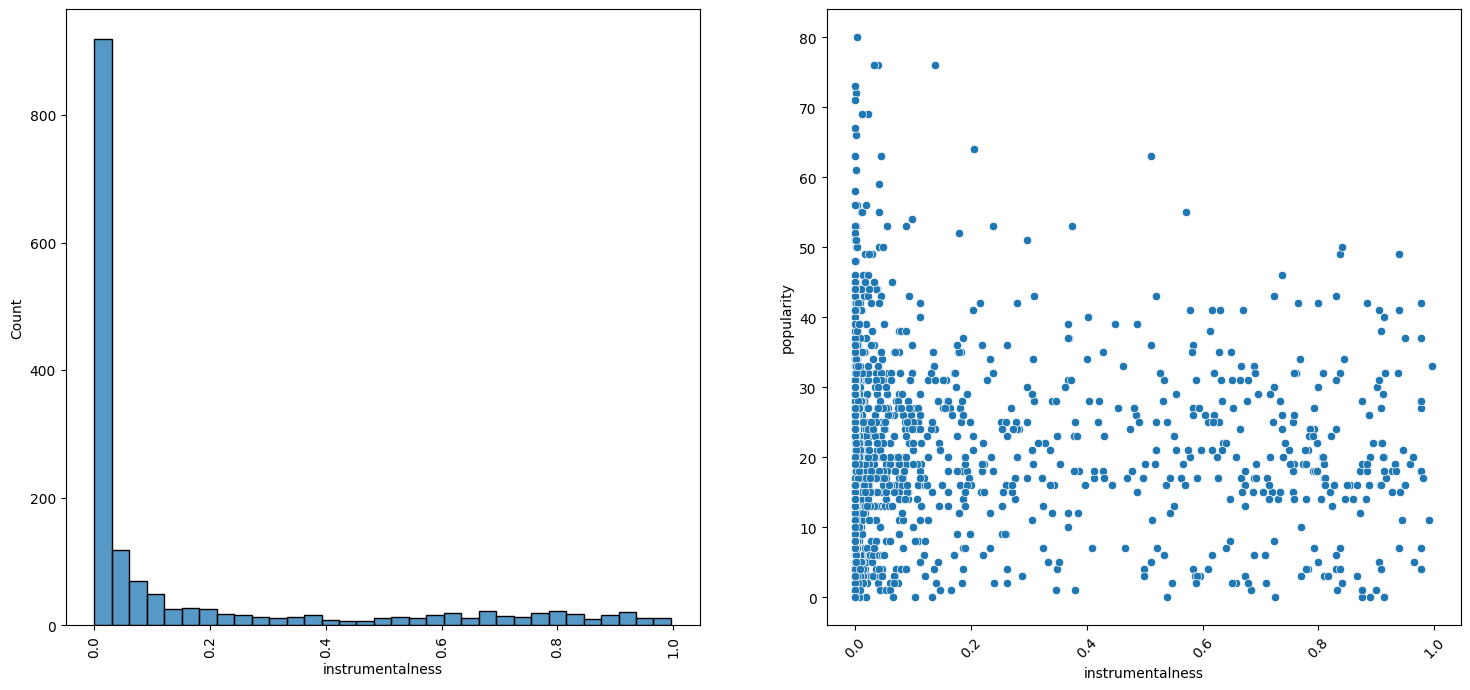

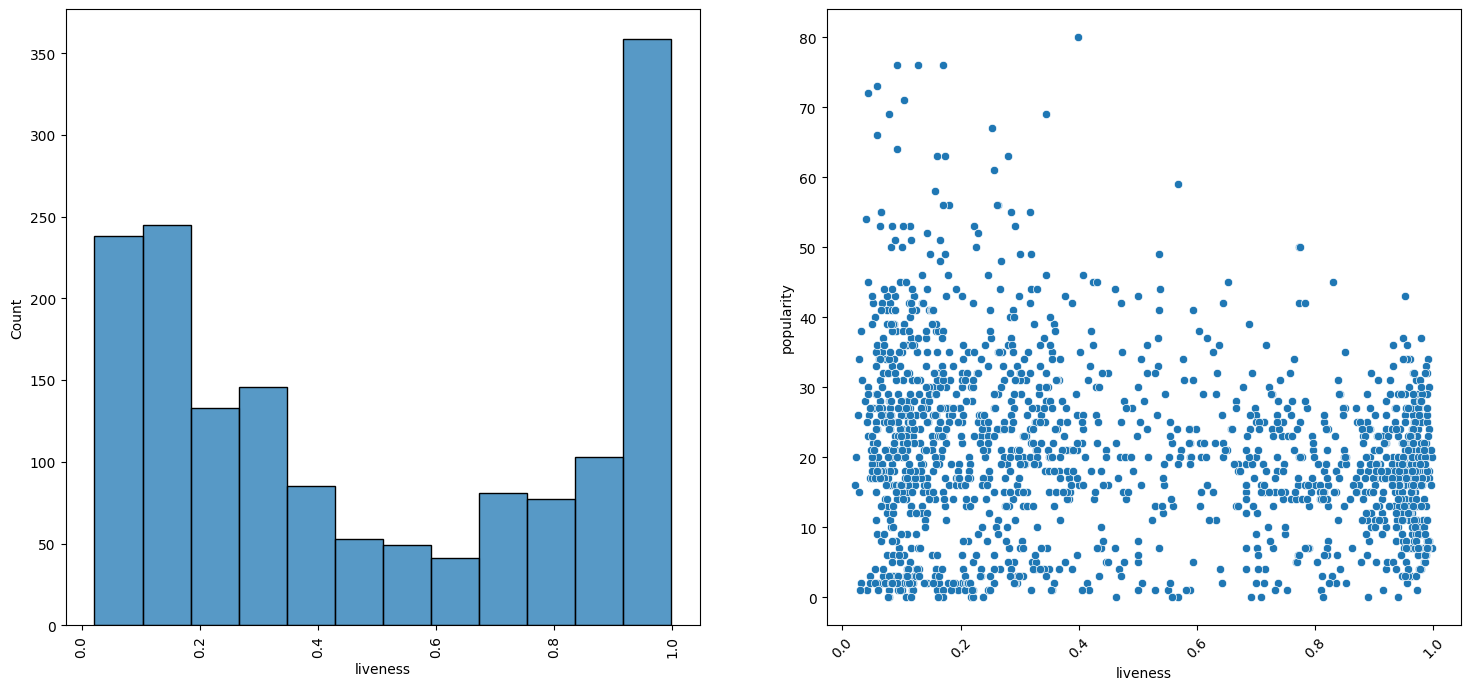

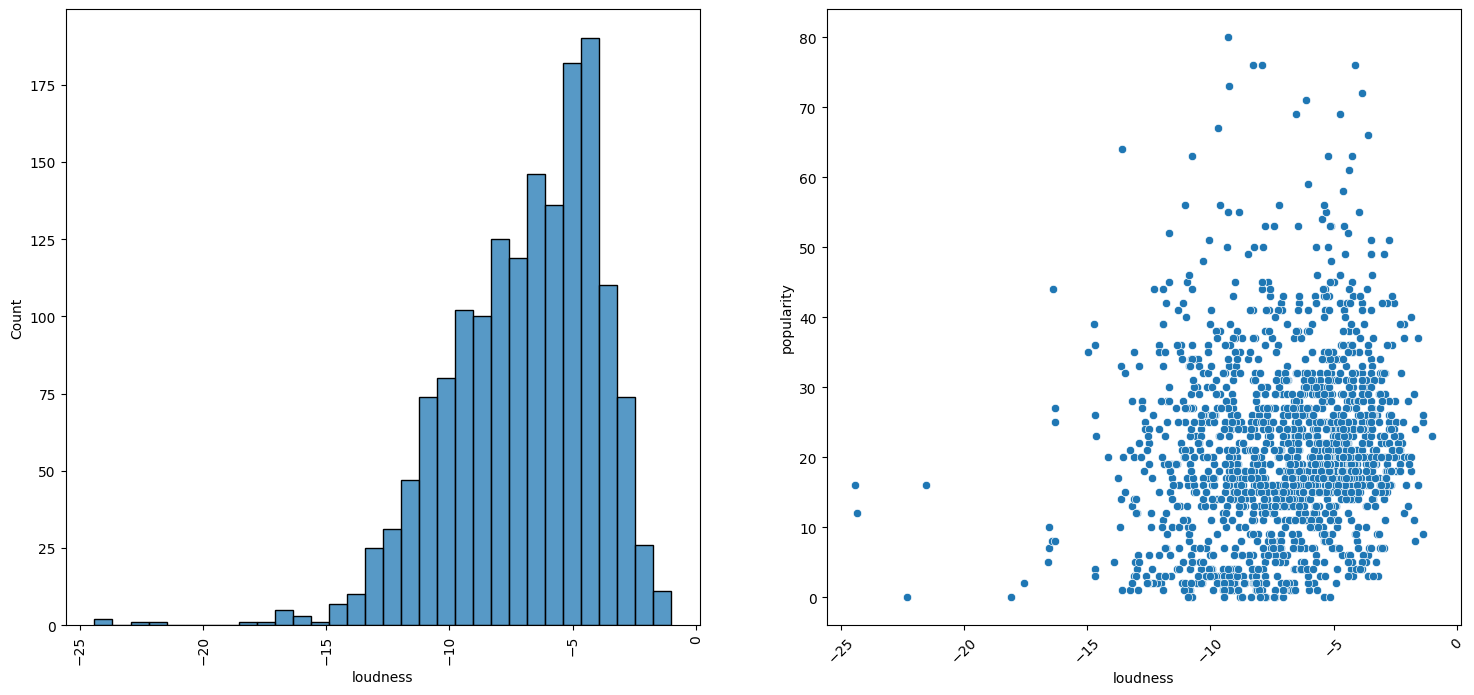

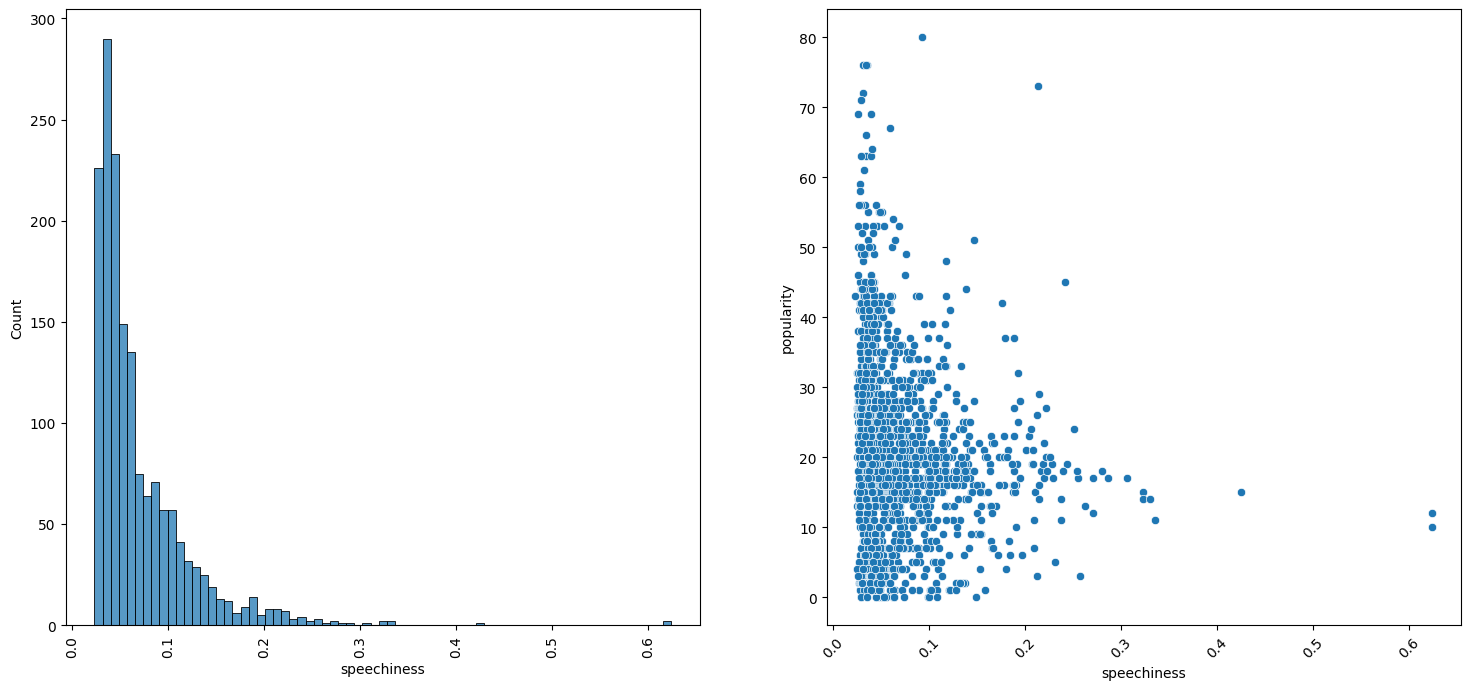

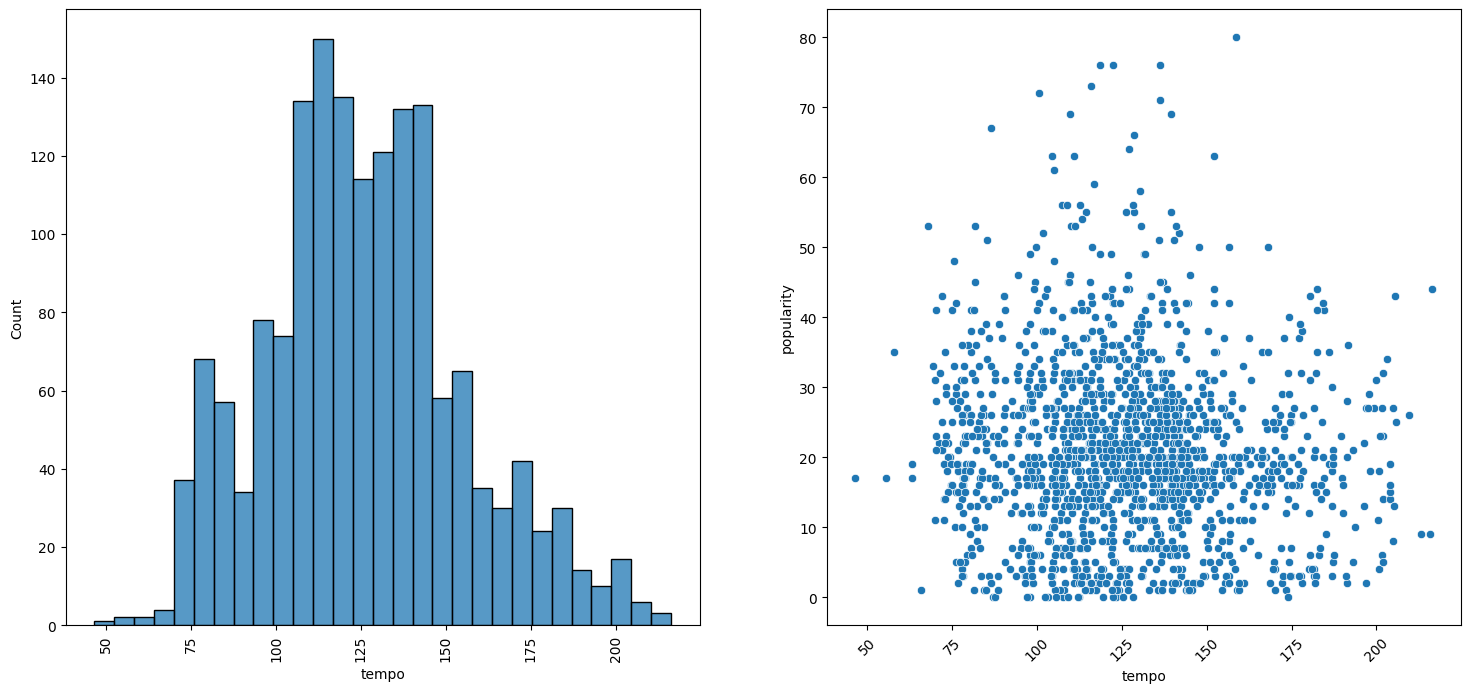

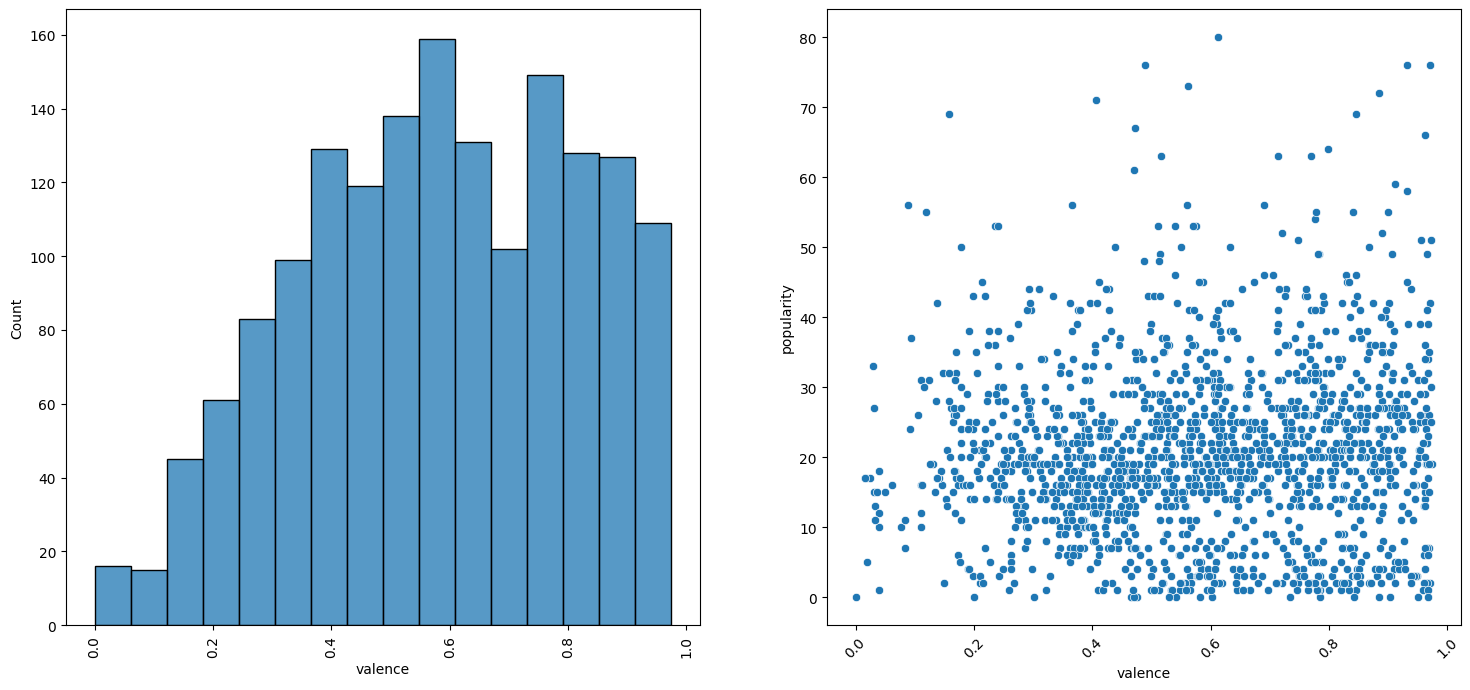

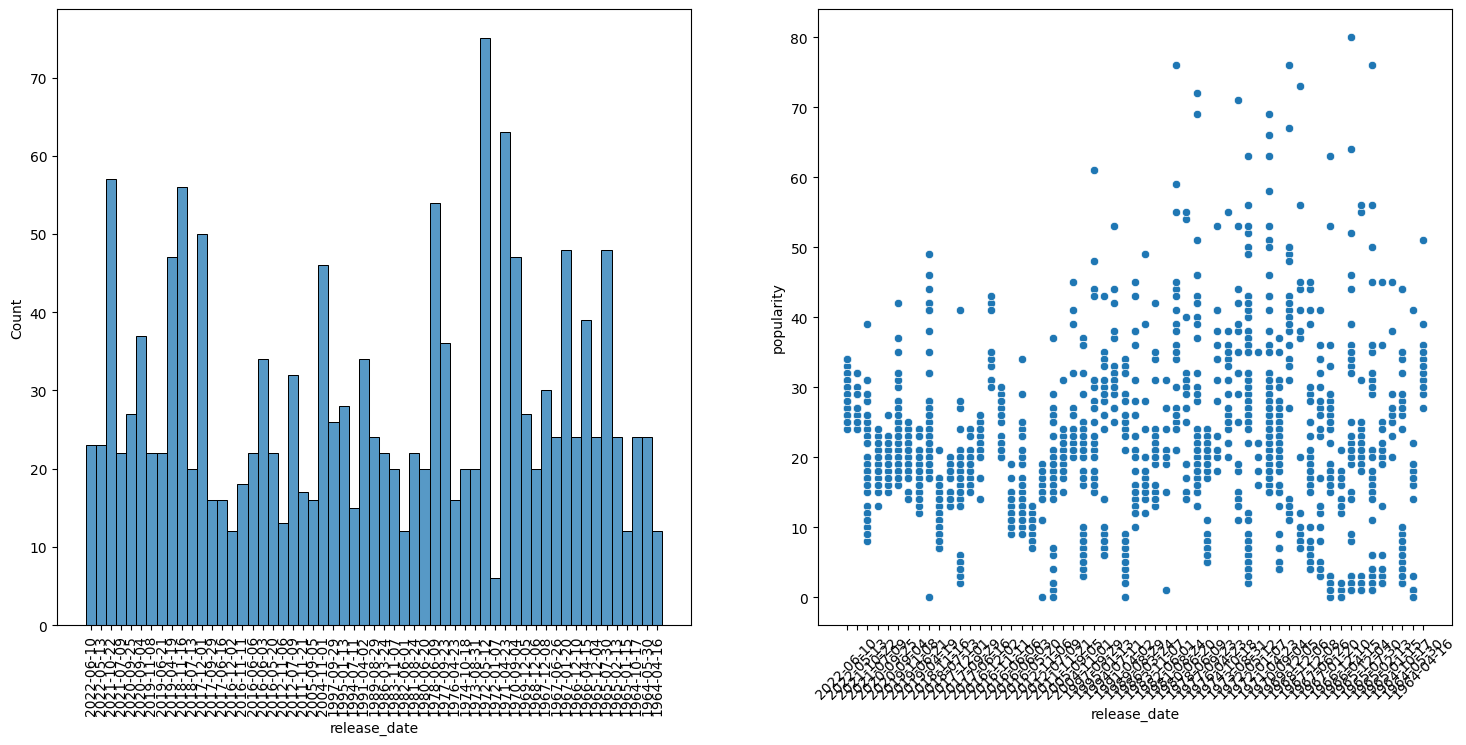

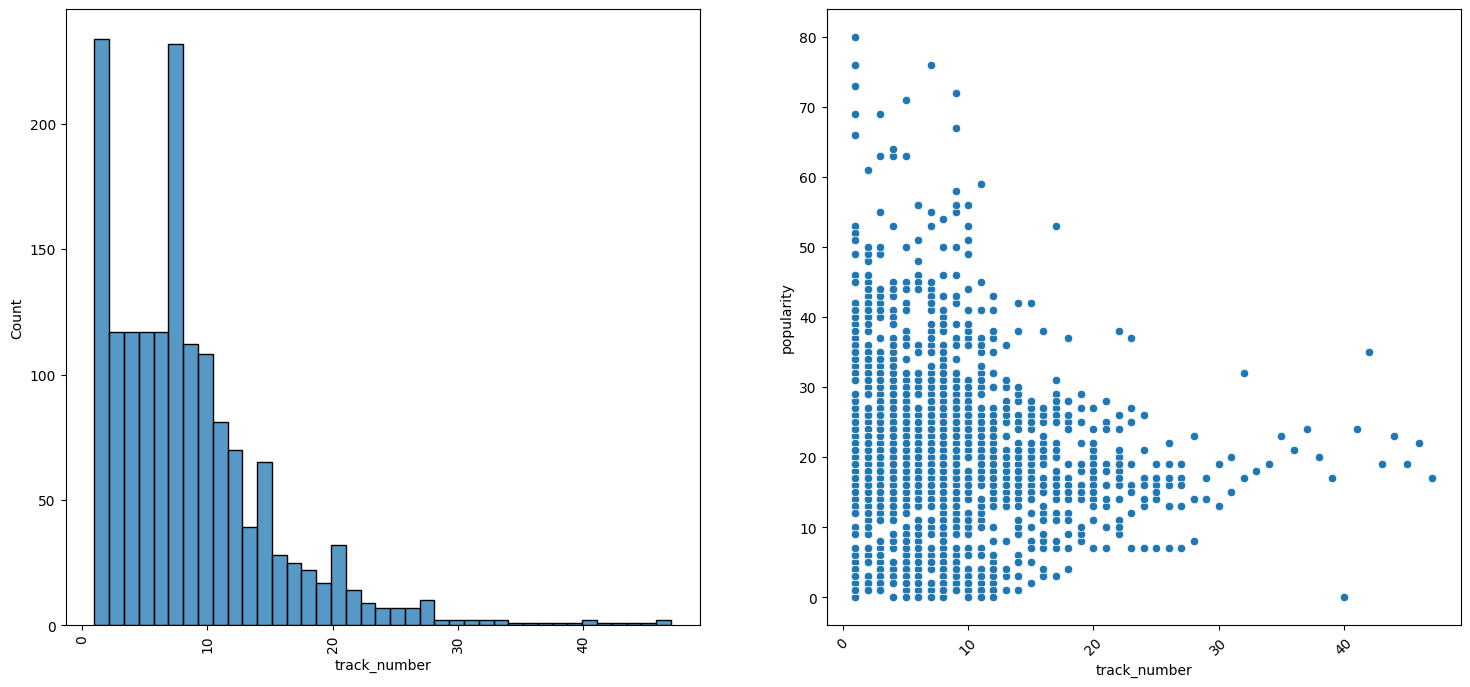

In [15]:
# Plot histplots for relevant columns that relate to characteristics of songs to see the distribution, and then the relation of those charactericstics to popularity, the main variable

cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'release_date', 'track_number']
for col in cols:
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    sns.histplot(df, x=col, ax=ax[0])
    ax[0].tick_params(axis='x', labelrotation=90)
    sns.scatterplot(df, x=col, y='popularity', ax=ax[1])
    plt.xticks(rotation=45)
    plt.show()

### Observations: 

Histplot & Distributions: Danceability, loudness, and tempo exhibit normal distributions, indicating a relatively even spread of values across songs without extreme outliers in these features. 

Acousticness, instrumentalness, and speechiness display right-skewed distributions, suggesting that most songs have lower values, with instrumentalness predominantly comprising '0' values. Similarly, track_number also skews right, which aligns with the typical number of tracks per album, averaging around 20. 

Energy and valence exhibit left-skewed distributions, indicating that most songs have higher values for these attributes. 

Finally, release_date and liveness do not exhibit discernible patterns in their distributions.

Scatterplot comparing features to popularity: Overall, there is no strong correlation between the different features of songs and the popularity thats discernable on the scatterplots. In order to try and see if we can find any covariance or correlation, below is a further analysis of the data set comparing the main features to popularity.  
 

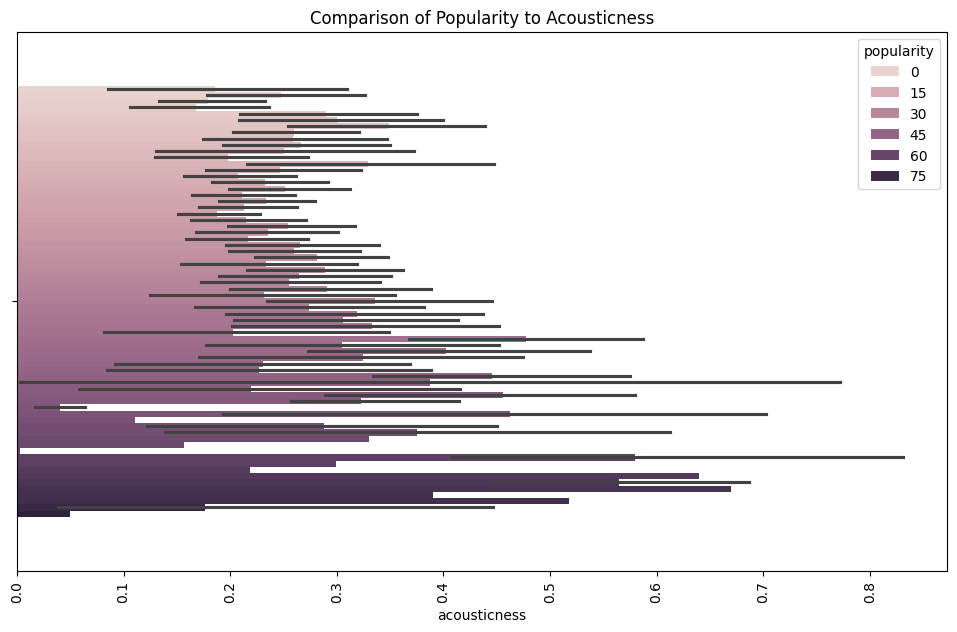

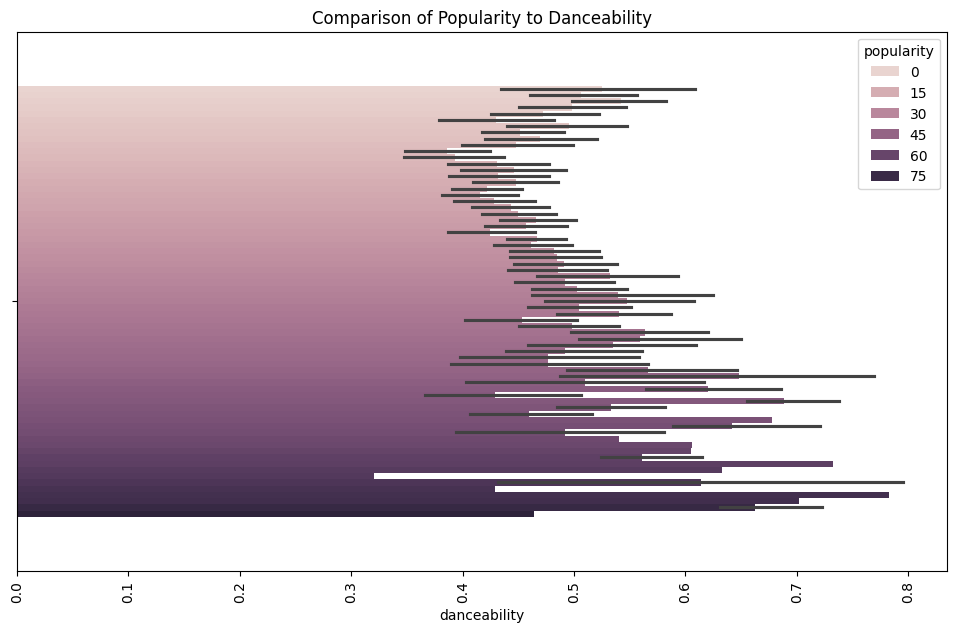

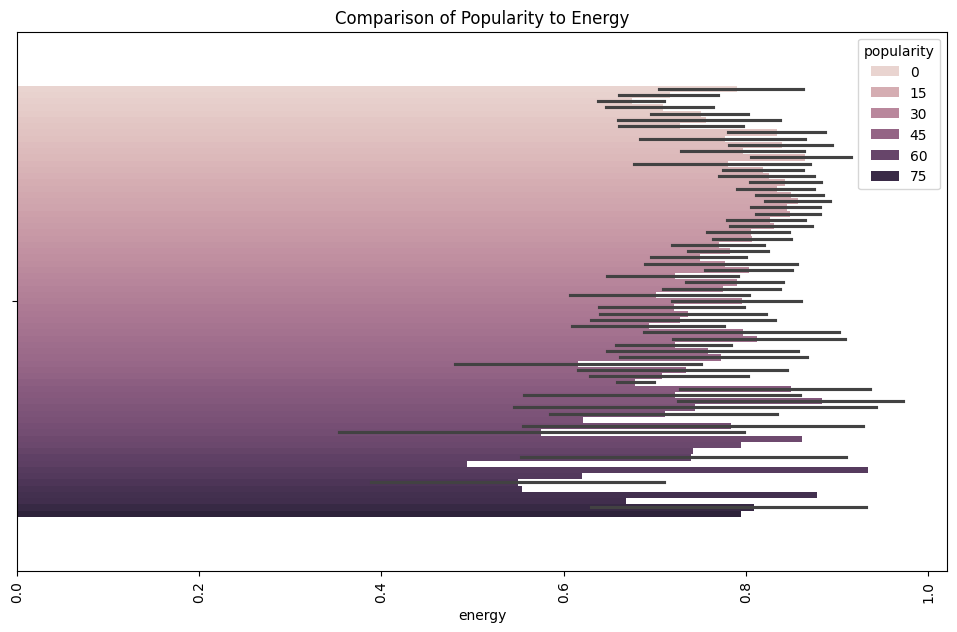

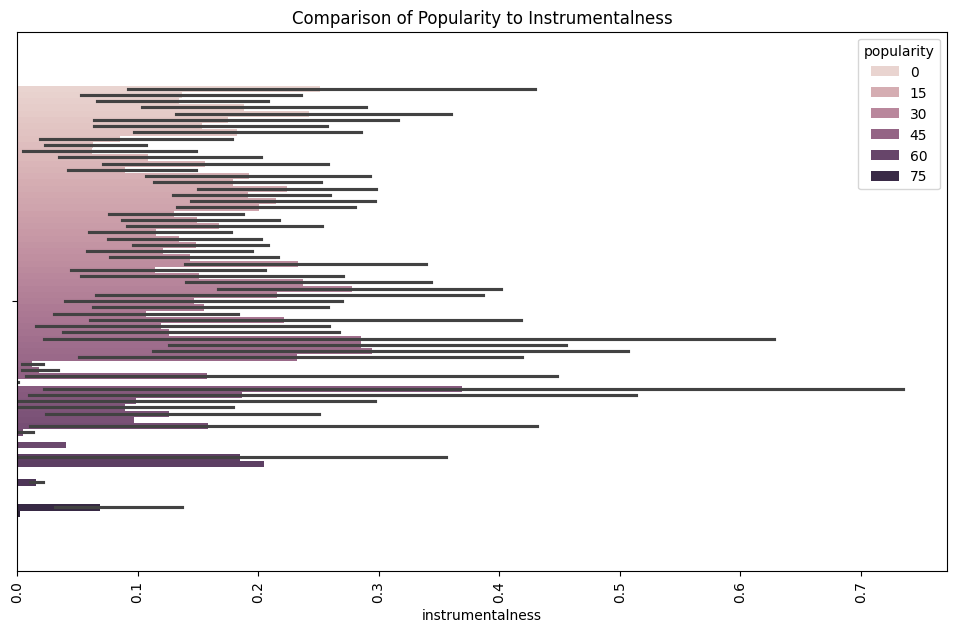

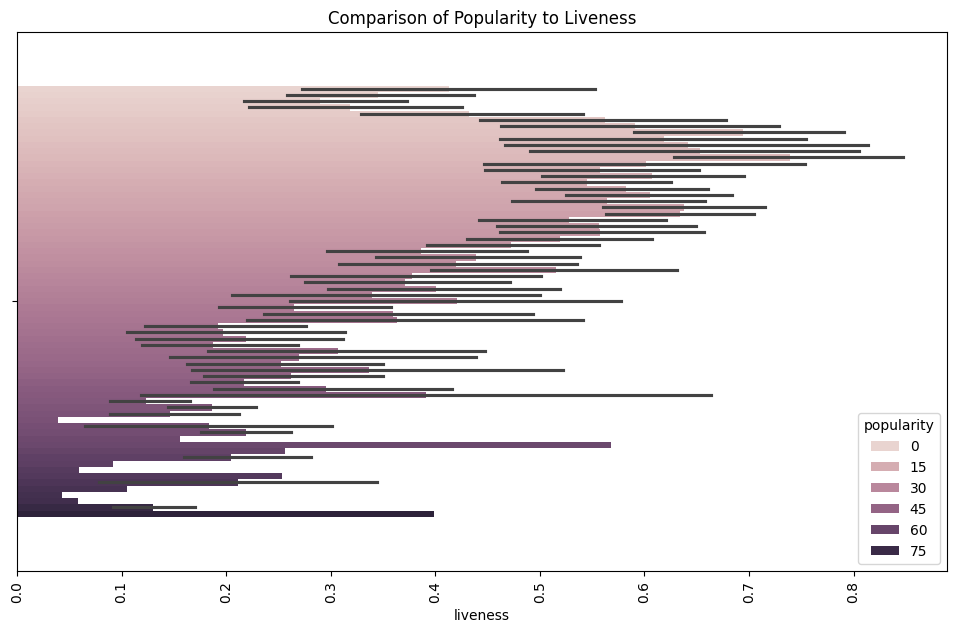

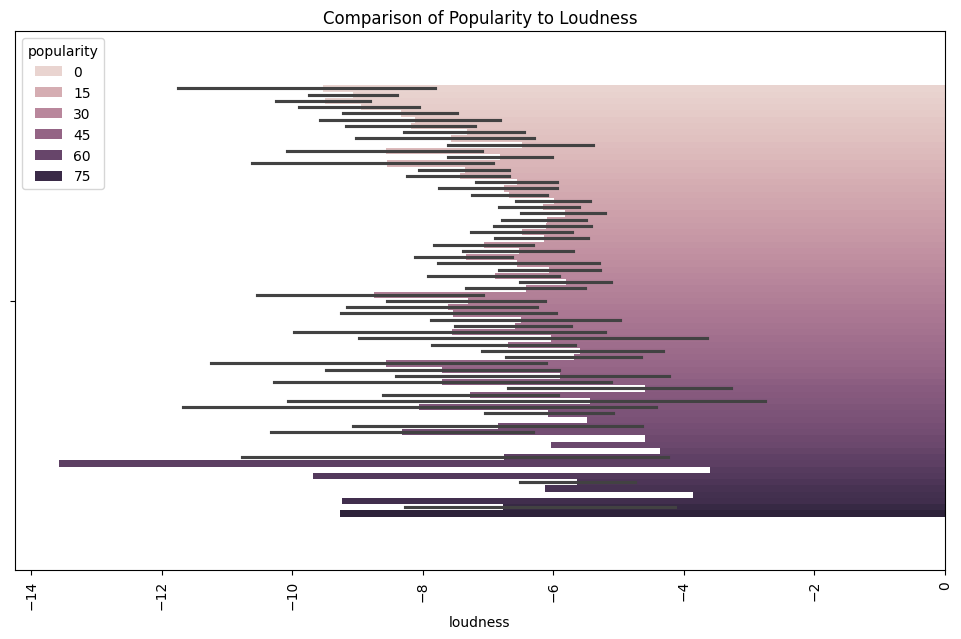

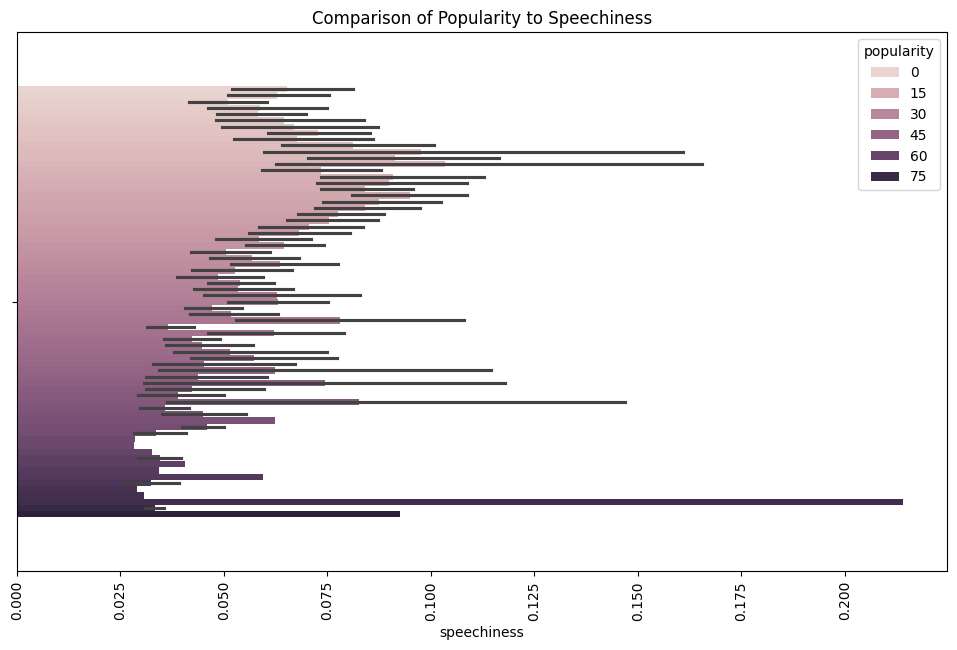

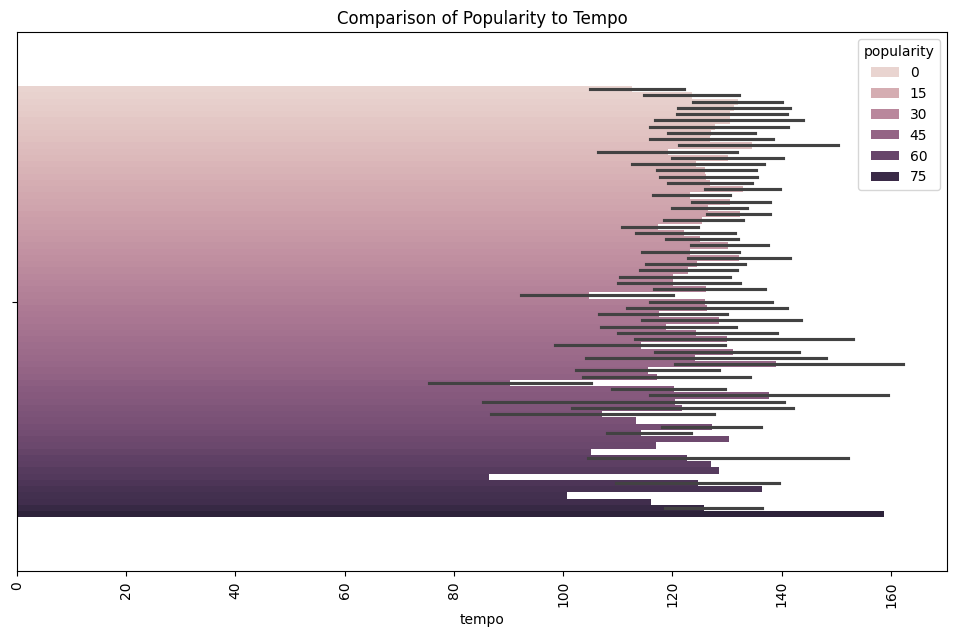

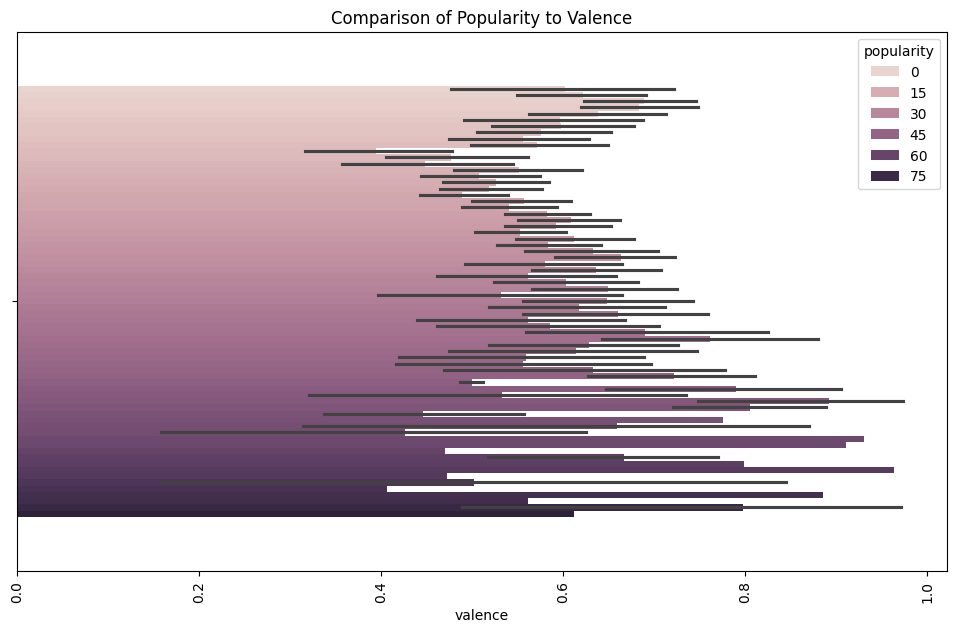

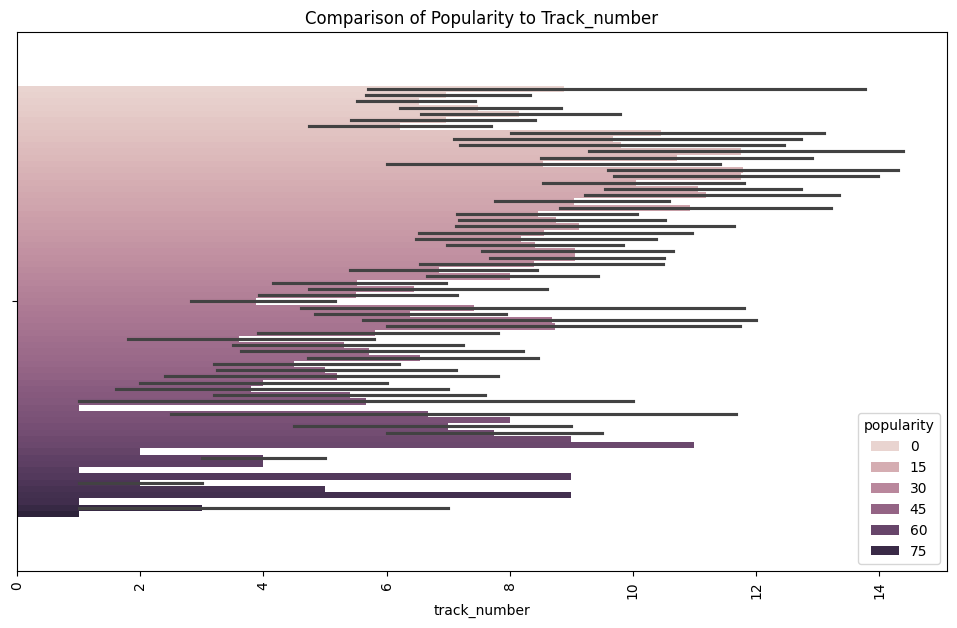

In [16]:
# Further bivariate analysis of popularity to other characteristics to see any correlation using different types of barplots
cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'track_number']

for col in cols:
    plt.figure(figsize=(12,7))
    sns.barplot(df, x=col, hue='popularity')
    plt.title(f'Comparison of Popularity to {(col.capitalize())}')
    plt.xticks(rotation=90)

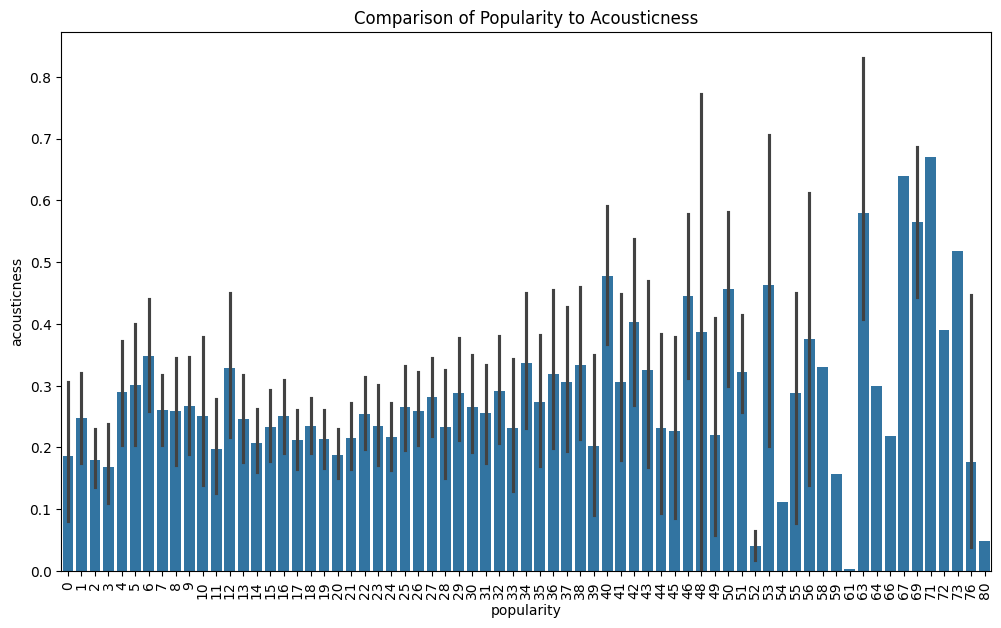

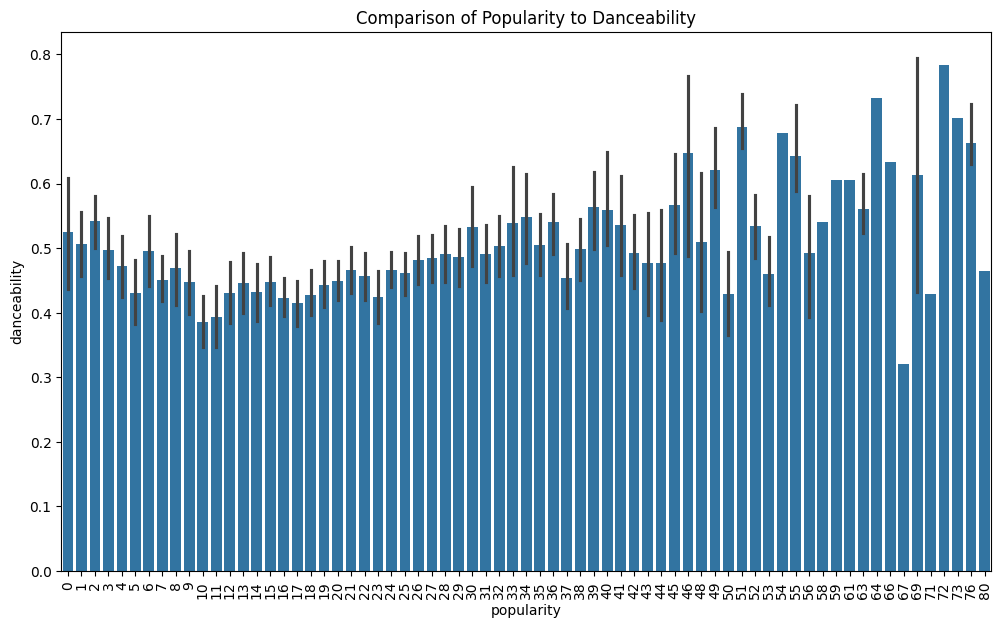

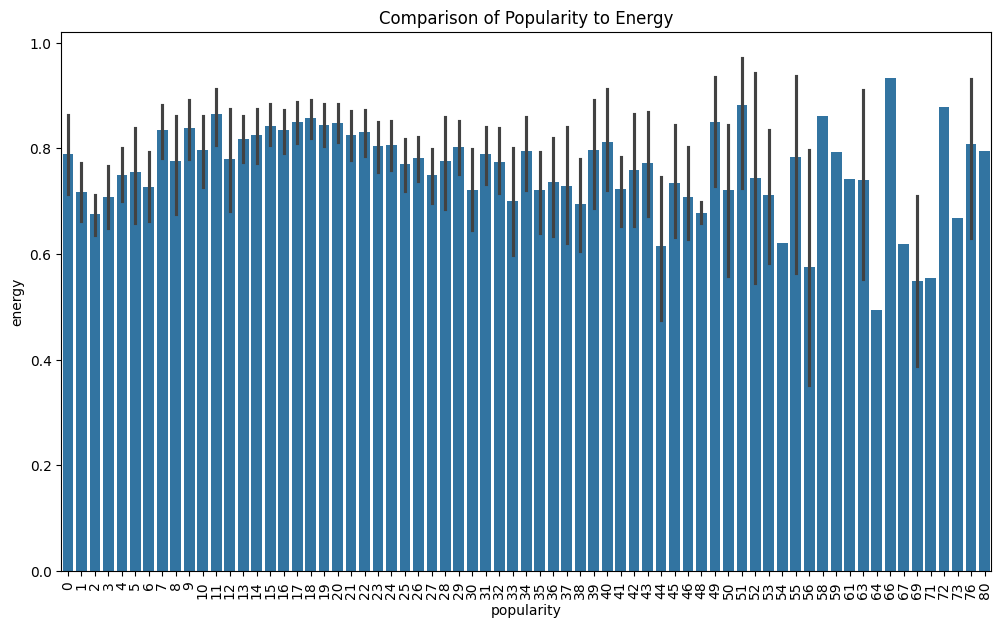

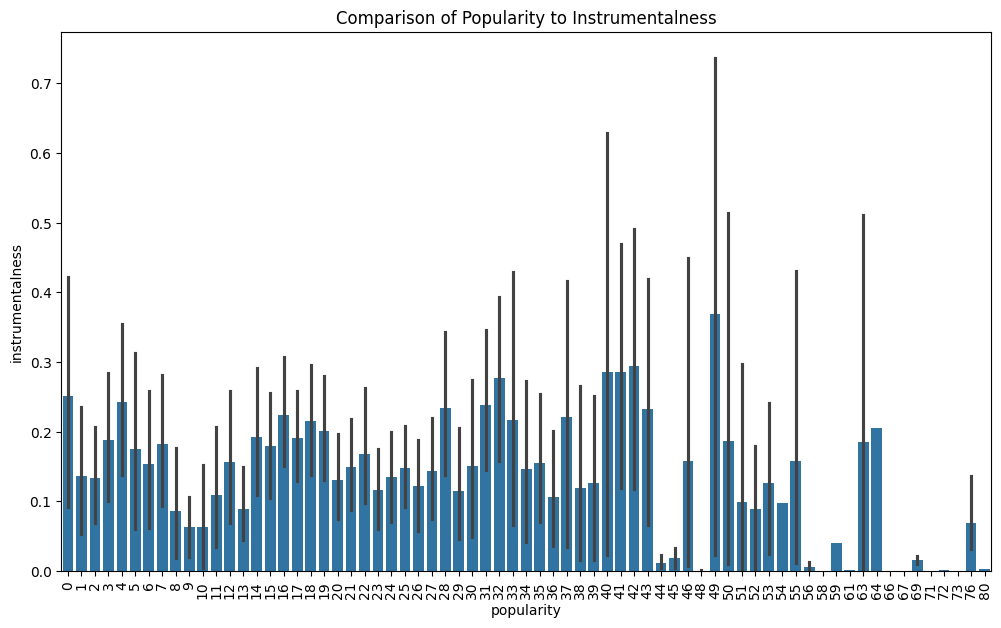

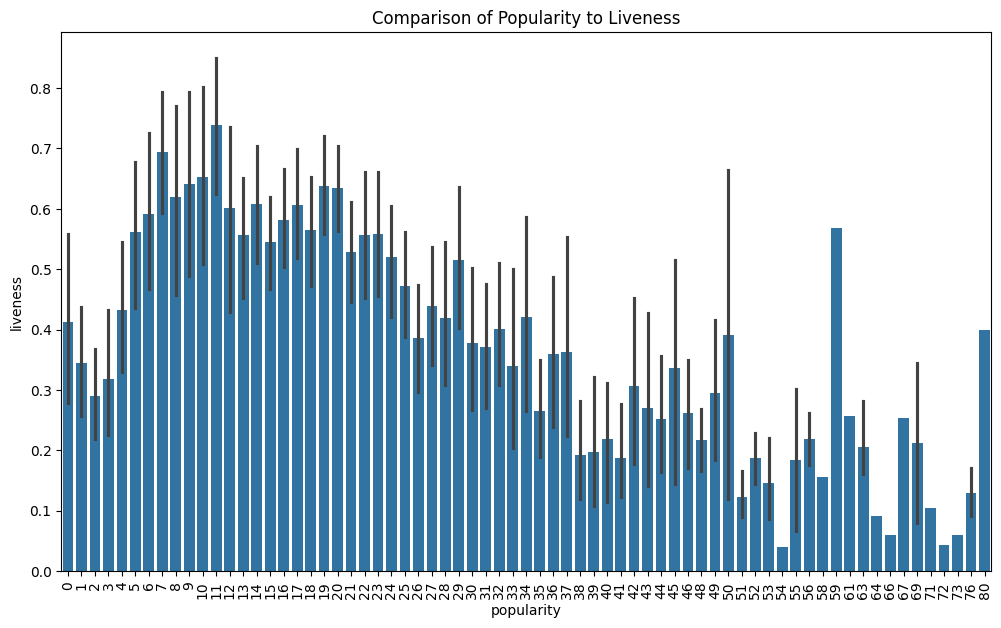

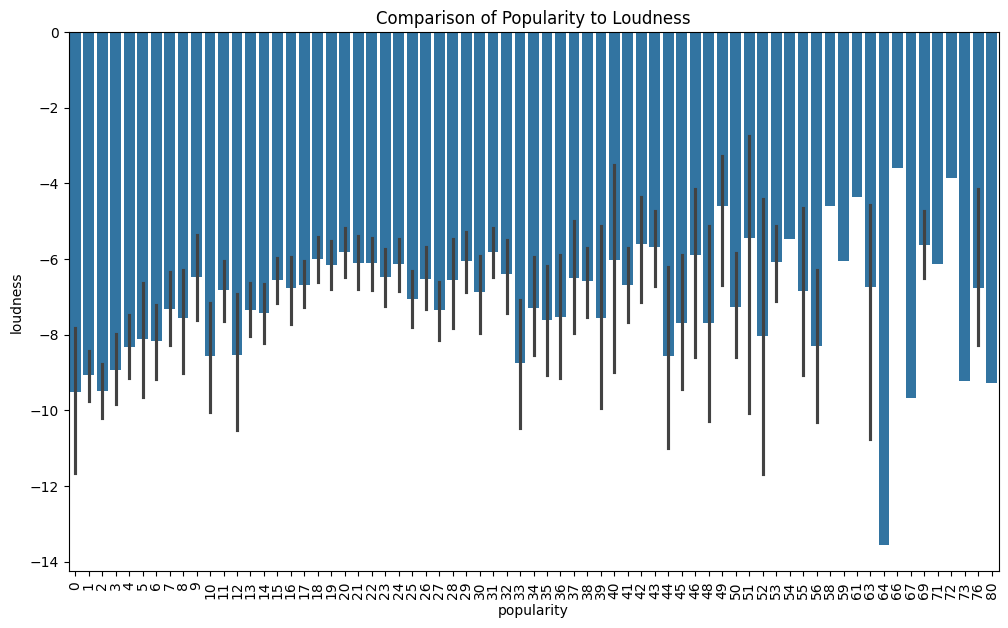

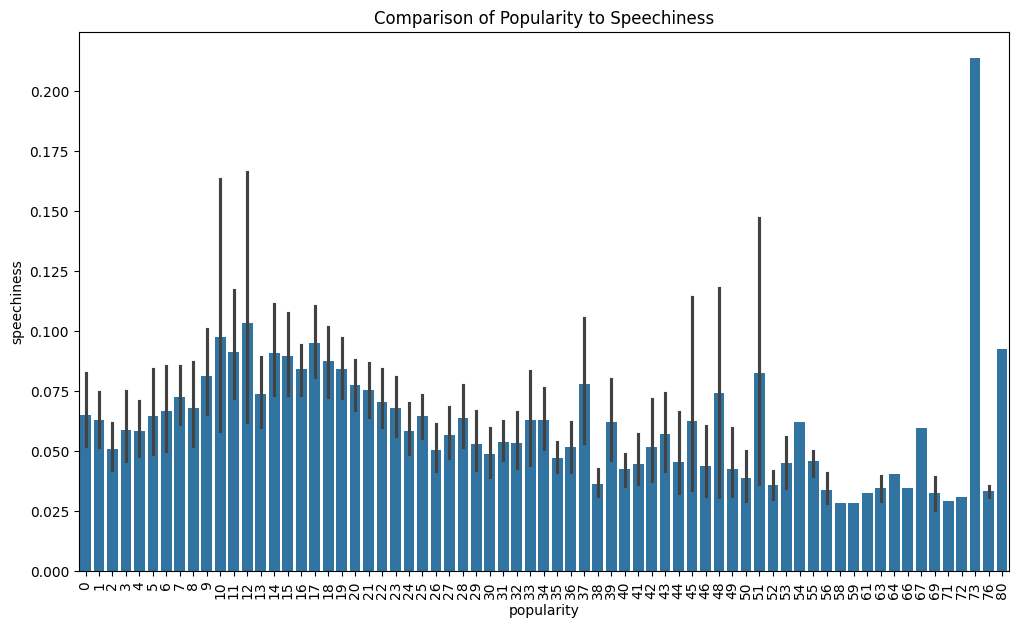

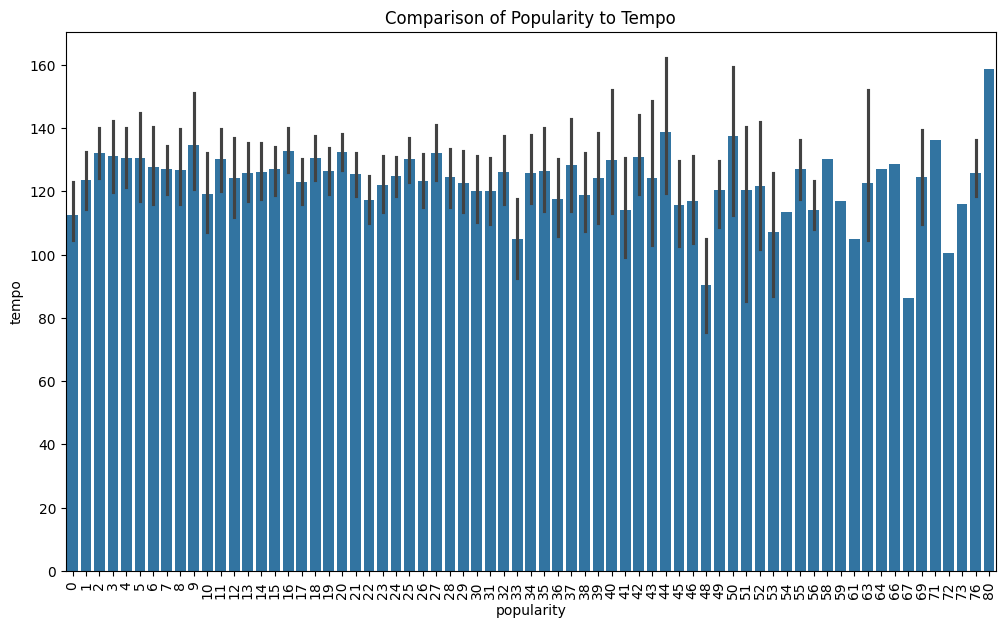

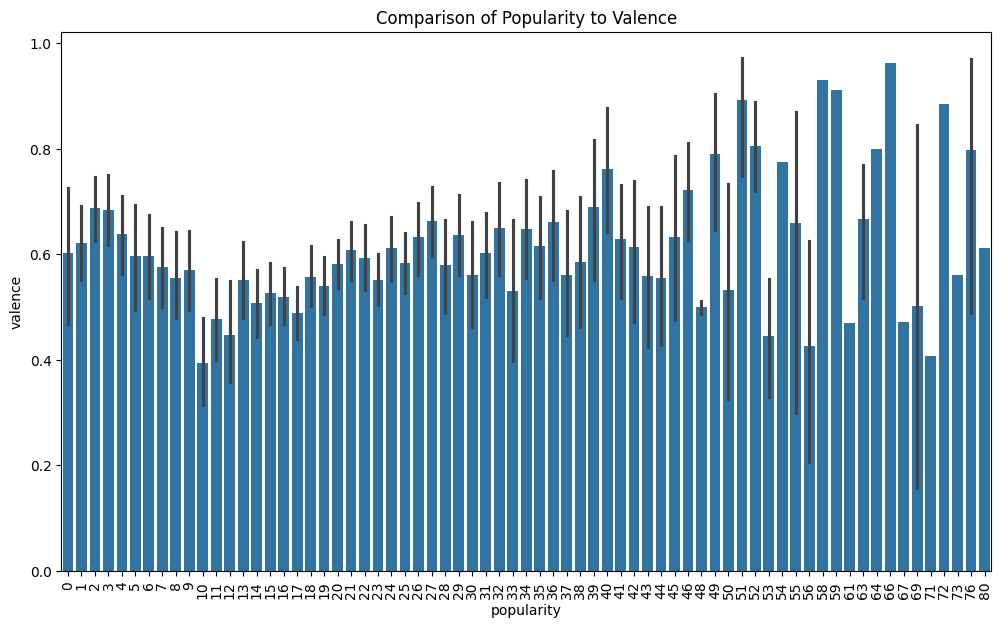

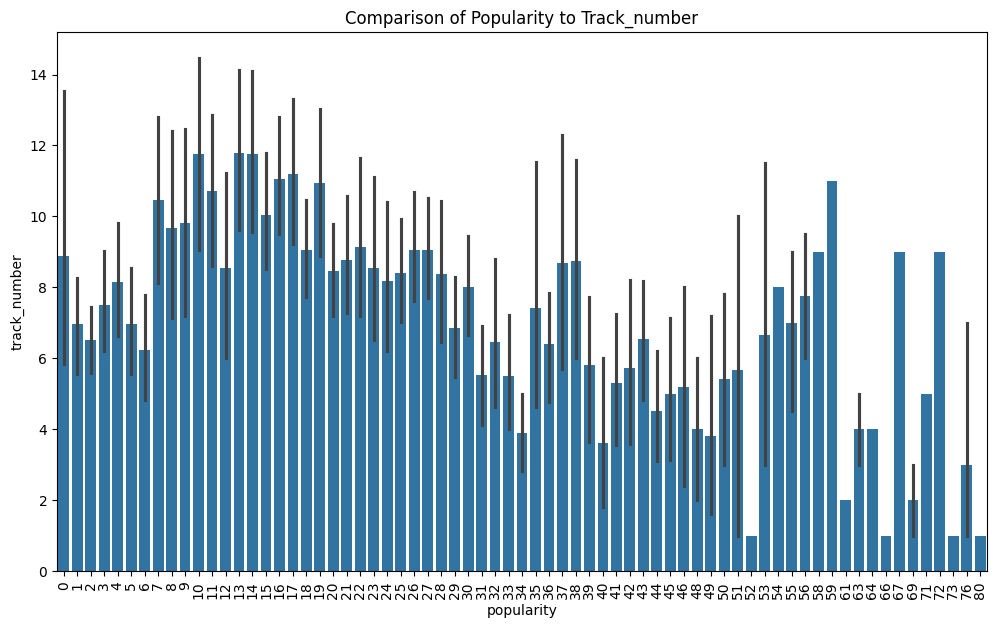

In [17]:
cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'track_number']

for col in cols:
    plt.figure(figsize=(12,7))
    sns.barplot(df, x='popularity', y=col)
    plt.title(f'Comparison of Popularity to {(col.capitalize())}')
    plt.xticks(rotation=90)
    plt.show()

### Observations:

There are subtle trends observed in both bar plots depicting acousticness and liveness. A slight positive correlation is noted between acousticness and popularity, albeit weak. On the other hand, an inverse relationship is observed between liveness and popularity, indicating that songs with higher liveness tend to be less popular. However, no significant correlation is discernible among the other features.

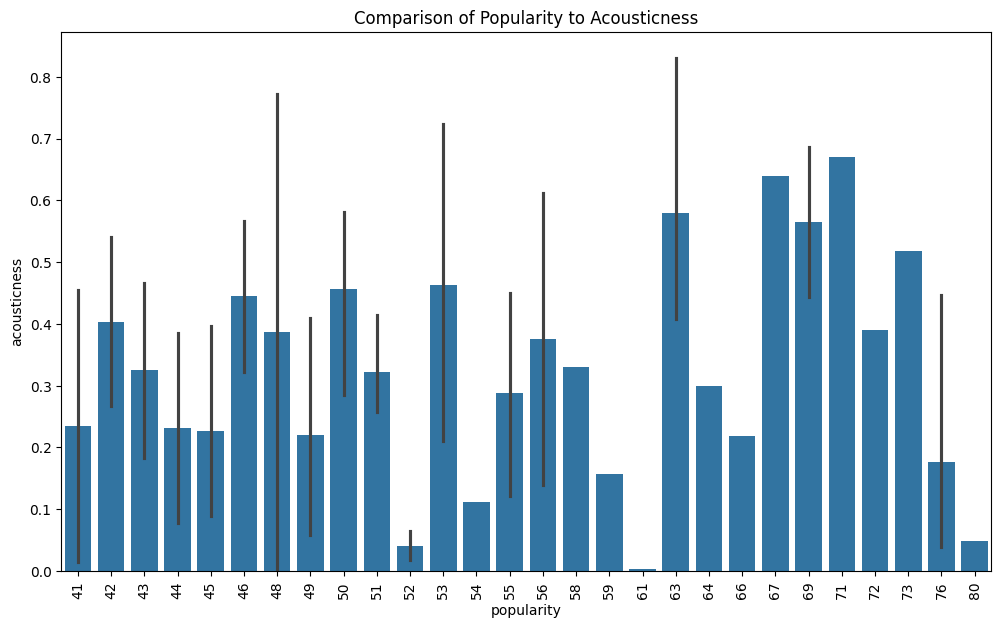

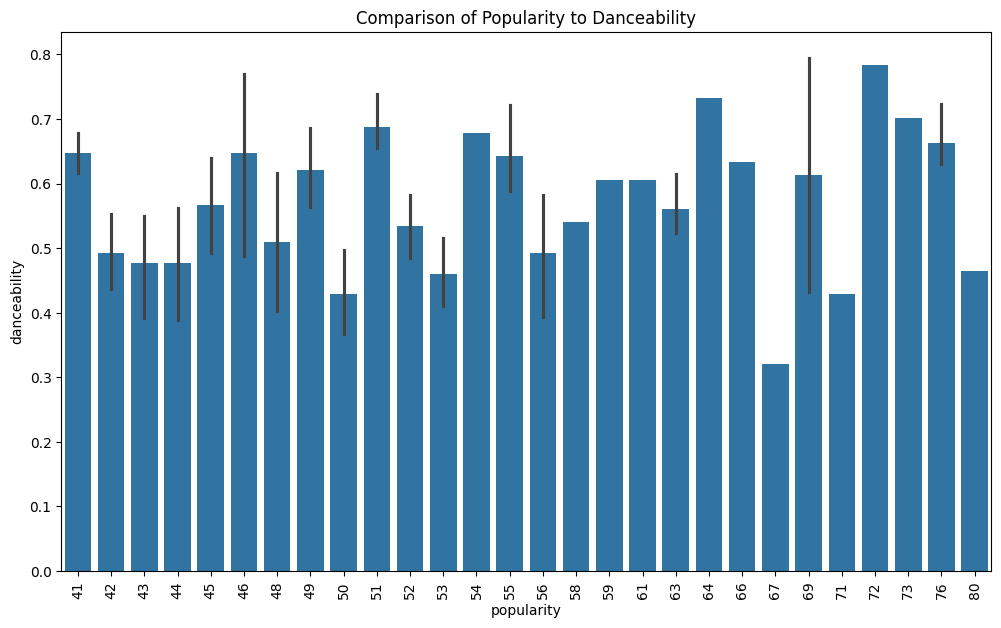

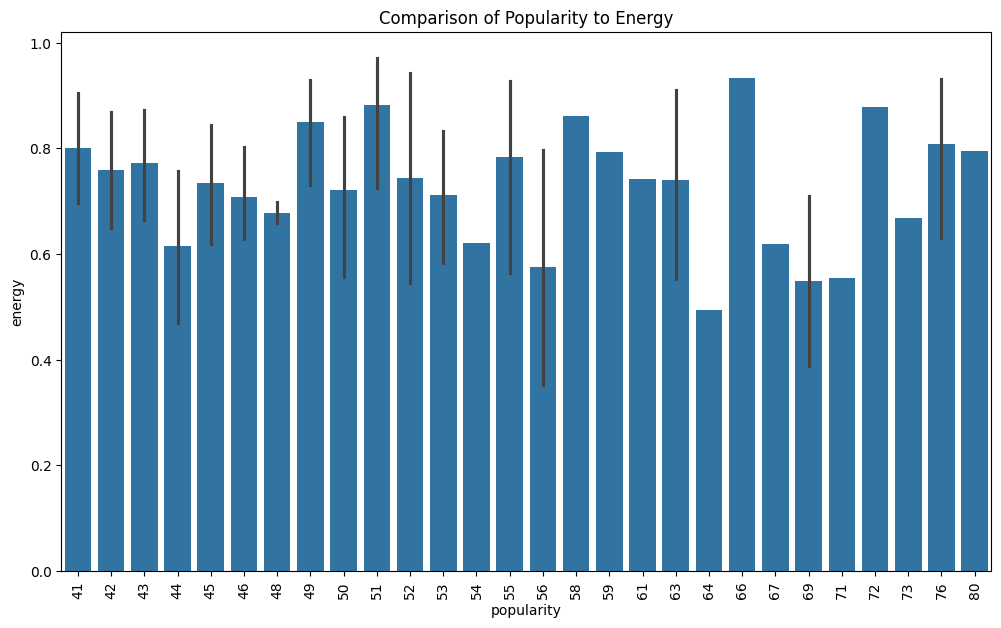

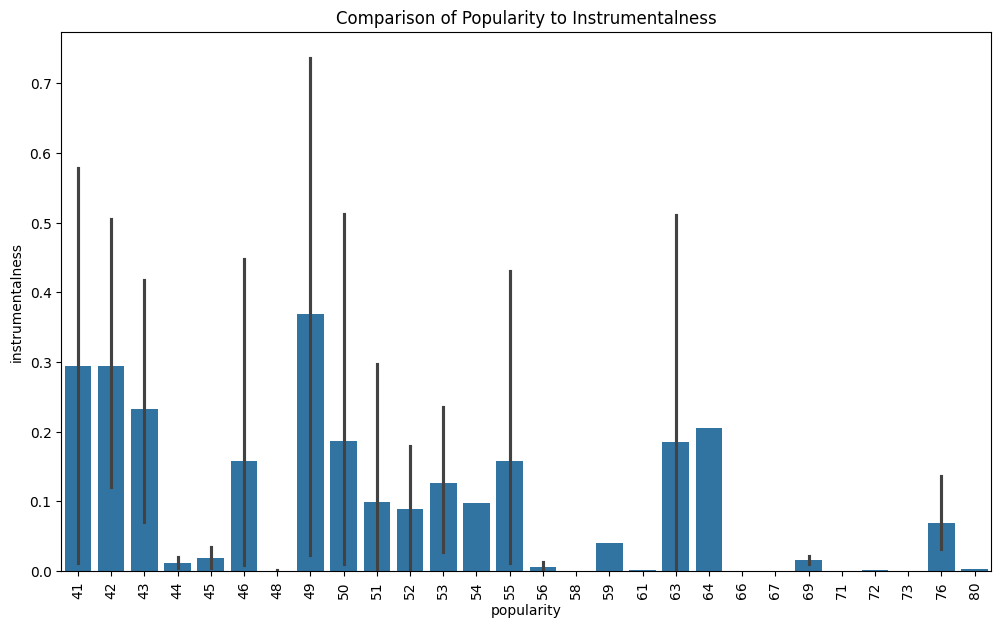

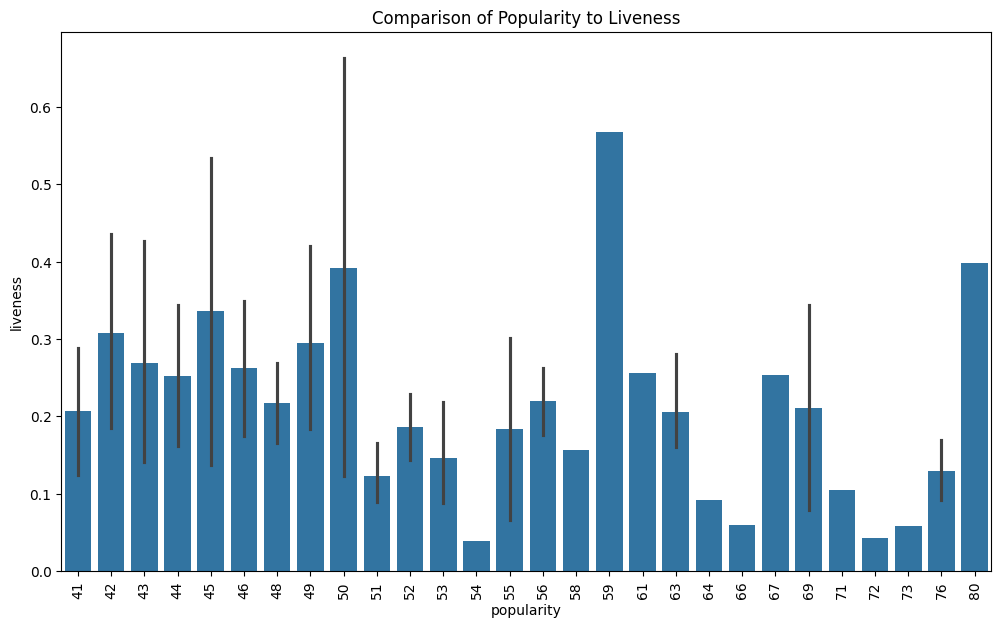

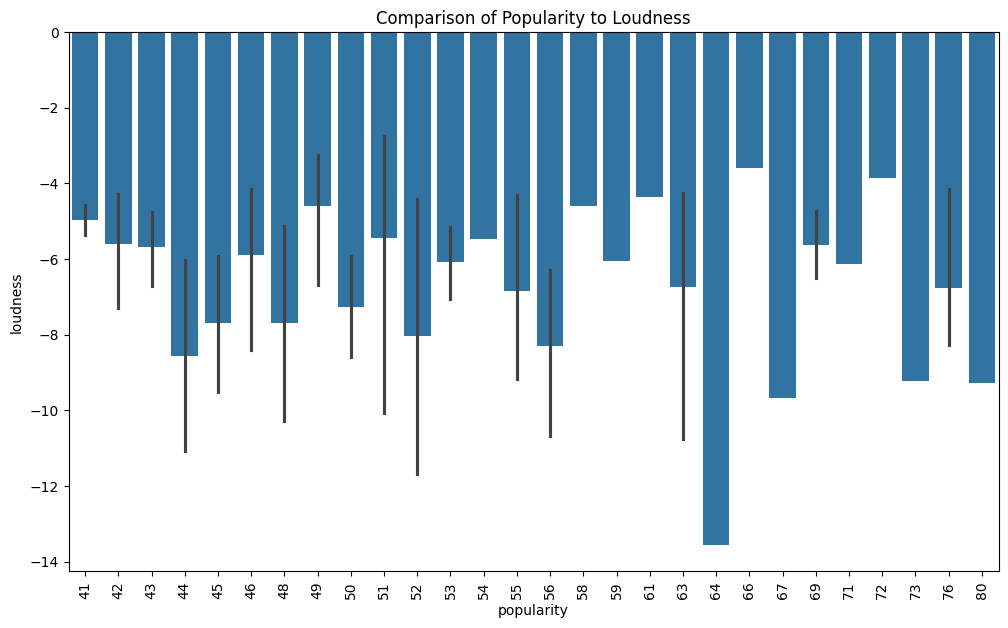

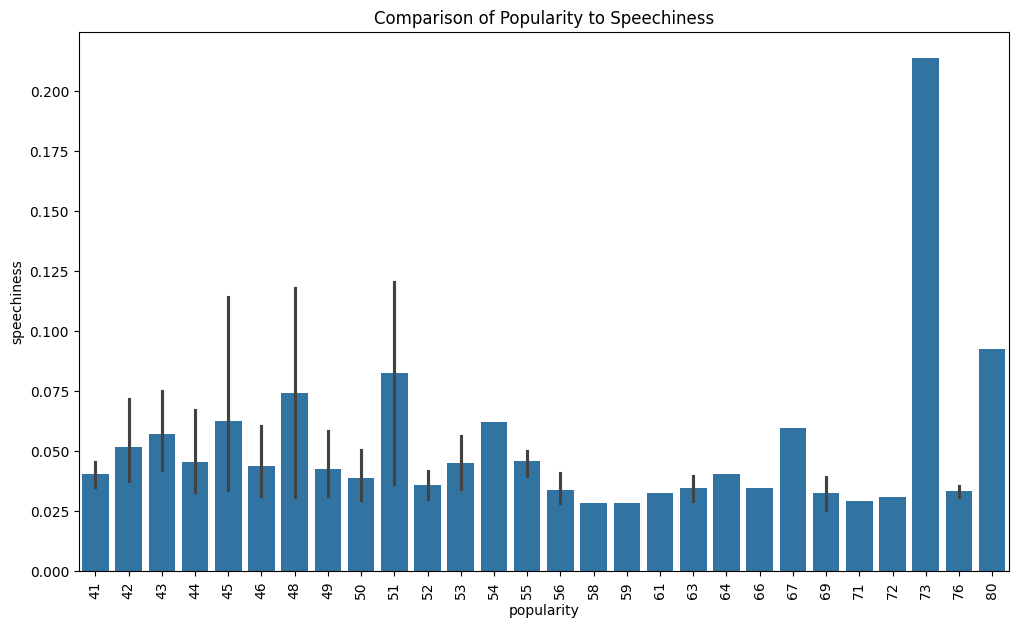

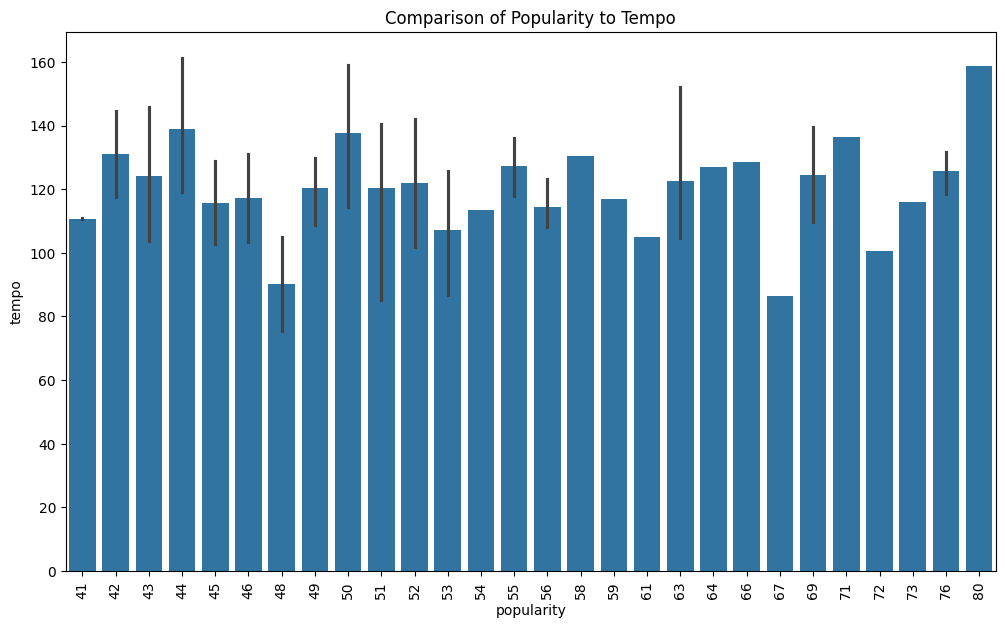

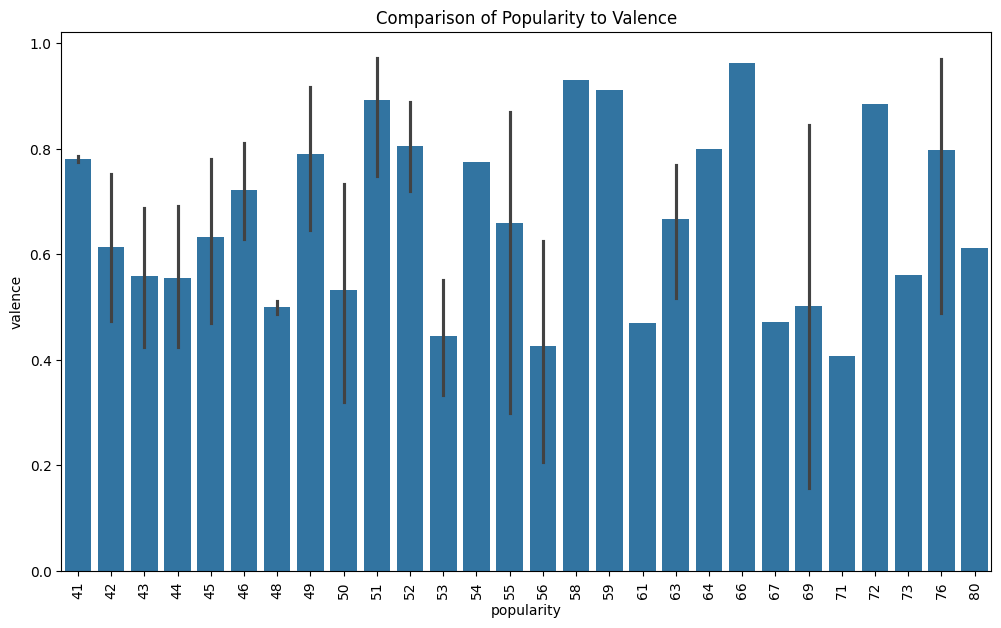

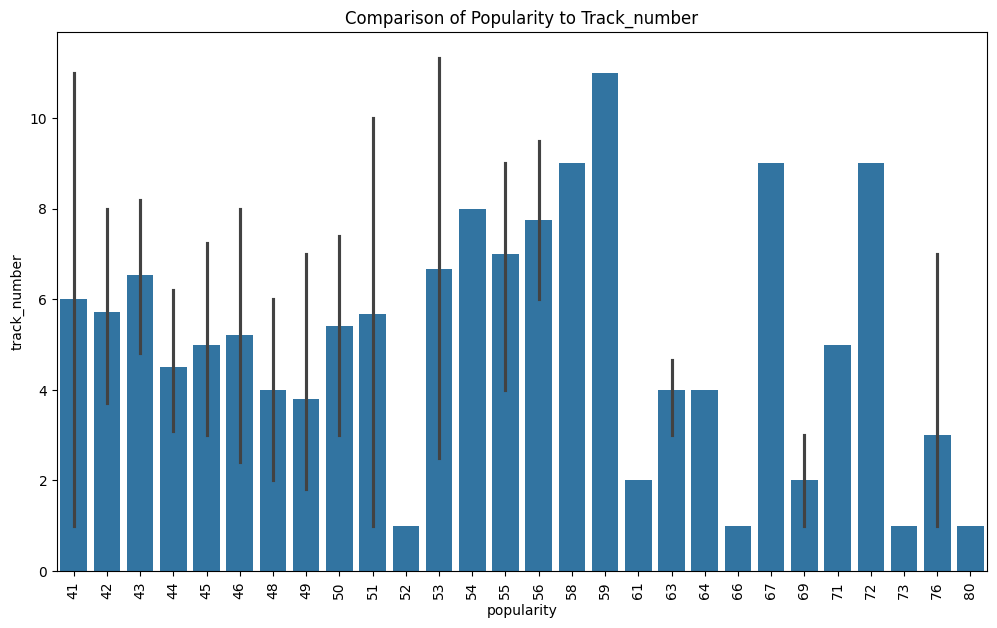

In [18]:
# Continued bivariate analysis simplifying down to the top 100 popular songs to see if we can identify any covariance or correlation. 
top_100_df = df.nlargest(100, 'popularity')
cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'track_number']

for col in cols:
    plt.figure(figsize=(12,7))
    sns.barplot(top_100_df, x='popularity', y=col)
    plt.title(f'Comparison of Popularity to {(col.capitalize())}')
    plt.xticks(rotation=90)
    plt.show()

Observations:

Breaking down the top 100 songs did not lead to any discernable or new information regarding features of the songs and their affect on how popular a song is. 

### Dimensionaliy Reduction: Principal Component Analysis/PCA - 

Insights: Given the limited discernible patterns of correlation observed in the previous data analysis, dimensionality reduction through PCA proves advantageous for simplifying the dataset without sacrificing the necessary information. This approach offers several benefits, primarily enhancing data visualization and facilitating the identification of meaningful patterns. PCA effectively filters out noise and irrelevant information, while also highlighting the most critical components necessary for the clustering model. This streamlined data representation aligns with the project's objective of creating cohesive song cohorts, underscoring the significance of PCA in achieving this goal. The main steps are highlighted below:

Step 1 - Convert categorical data using label encoder, creating new versions of the categorical columns to plot, but retaining the original categorical columns for later use in listing the clusters.   

Step 2 - split the data into training and testing

Step 3 - Scale the data with a standard scaler, by fitting and then transforming



In [19]:
# Encode the data set as outlined above creating the new columns for the categorical data needed later on
le = LabelEncoder()
df['id_code'] = le.fit_transform(df['id'])
df['uri'] = le.fit_transform(df['uri'])
df['album_code'] = le.fit_transform(df['album'])
df['release_date'] = le.fit_transform(df['release_date'])
df['name_code'] = le.fit_transform(df['name'])

In [20]:
# Drop the categorical data in order to plot the data set
df1 = df.drop(['name', 'album', 'id', 'uri', 'release_date'], axis=1)
X_train, X_test = train_test_split(df1, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
# Scale the data
scaler = StandardScaler()
scaler.fit(df1)

StandardScaler()

In [22]:
scaled_data = scaler.transform(df1)

In [23]:
# Apply PCA using two components; two is chosen due to the simplicity  needed and size of the data set
pca = PCA(n_components=2)

In [24]:
pca.fit(scaled_data)

PCA(n_components=2)

In [25]:
pca.explained_variance_*(10)

array([31.64453383, 16.89375204])

In [26]:
X_new = pca.transform(scaled_data)
scaled_data.shape

(1610, 15)

In [27]:
X_new.shape

(1610, 2)

In [28]:
X_new

array([[-0.63754199,  0.19785955],
       [-1.62155901,  0.64328509],
       [-1.76217387,  0.37486471],
       ...,
       [ 2.14626526, -1.12767674],
       [ 2.13879196,  0.71155774],
       [ 1.82246169, -1.32797253]])

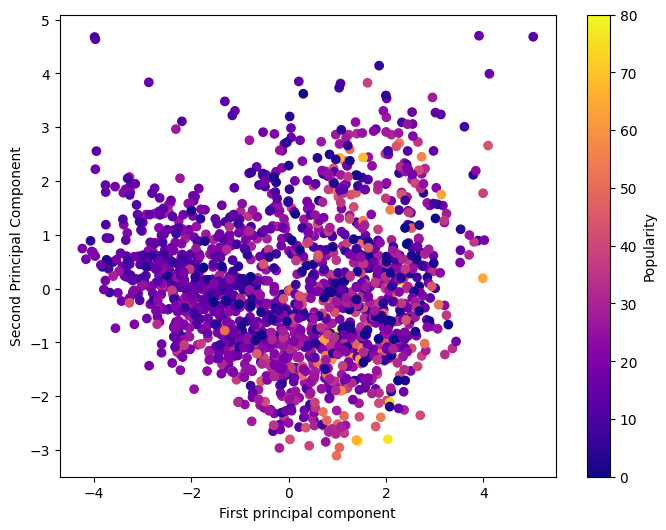

In [29]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_new[:,0],X_new[:,1],c=df['popularity'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Popularity')
plt.show()

In [30]:
pca.explained_variance_

array([3.16445338, 1.6893752 ])

In [31]:
len(pca.components_[0])

15

In [32]:
pca.components_

array([[-0.14101216,  0.15430628,  0.40154488, -0.41312415, -0.00103461,
        -0.44089106, -0.3379348 , -0.34608756, -0.18538404,  0.26393522,
         0.10336929, -0.22573495,  0.00279119, -0.17415229,  0.00504401],
       [ 0.0942132 ,  0.44050441, -0.22884215, -0.40936473, -0.15118677,
         0.0909891 , -0.3651762 ,  0.13369991, -0.14463271, -0.53974064,
        -0.11992752,  0.18989046,  0.08468161, -0.004502  ,  0.15778128]])

## Step 4. Perform Cluster Analysis

A - Identify the right number of clusters

B - Use appropriate clustering algorithms

C - Define each cluster based on the features

Insights: Given the goal of creating a cohort of songs based on features, I chose K-means as the clustering technique. K-means is simple, efficient, and doesn't require labeled data, making it suitable for large datasets like those from Spotify. Its clusters are easy to interpret, allowing straightforward analysis of each cluster's characteristics. Additionally, K-means offers flexibility in specifying the number of clusters, scalability with dataset size, and the ability to experiment with different clustering configurations. Overall, K-means provides a practical and effective approach for grouping songs into cohorts based on their features.


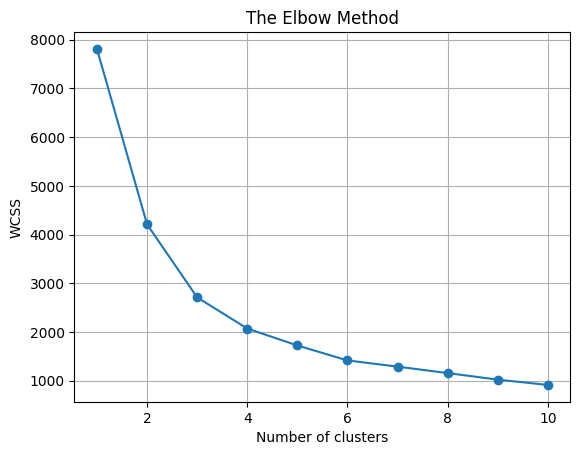

In [33]:
# First step is to use the elbow method to try and find the appropriate number of clusters 
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    model.fit(X_new)
    wcss.append(model.inertia_)
plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [34]:
# It seems like the line curves off at 4, so lets plot 4 clusters
model = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42, max_iter=2)
y_kmeans = model.fit_predict(X_new)

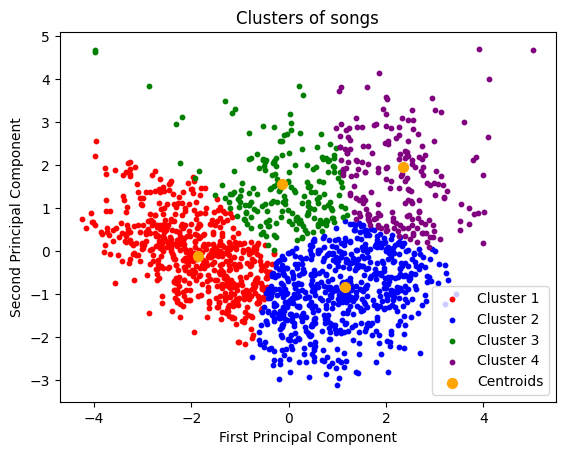

In [35]:
plt.scatter(X_new[y_kmeans == 0, 0], X_new[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_new[y_kmeans == 1, 0], X_new[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_new[y_kmeans == 2, 0], X_new[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X_new[y_kmeans == 3, 0], X_new[y_kmeans == 3, 1], s = 10, c = 'purple', label = 'Cluster 4')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 50, c = 'orange', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

Observations: The plot above exhibits significant overlap among clusters, indicating a high level of ambiguity in the clustering. To mitigate this issue and enhance the granularity of the clustering, we'll double the number of clusters. By increasing the number of clusters, we aim to refine the segmentation of songs into more distinct cohorts, thereby facilitating more precise recommendations tailored to different song characteristics
 

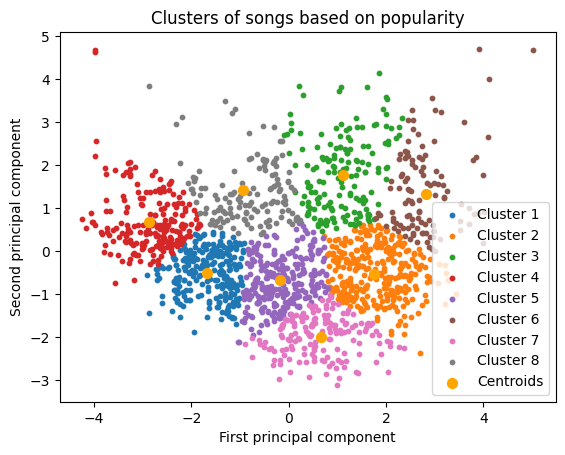

In [36]:

model = KMeans(n_clusters=8, init='k-means++', random_state=42, max_iter=2)
y_kmeans = model.fit_predict(X_new)

# Scatter plot for each cluster
for cluster_label in range(8):
    plt.scatter(X_new[y_kmeans == cluster_label, 0], 
                X_new[y_kmeans == cluster_label, 1], 
                s=10, 
                label=f'Cluster {cluster_label + 1}')

# Plot centroids
plt.scatter(model.cluster_centers_[:, 0], 
            model.cluster_centers_[:, 1], 
            s=50, 
            c='orange', 
            label='Centroids')

plt.title('Clusters of songs based on popularity')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend()
plt.show()

 


Observations: The above plot has much less overlap with more distinct cohorts that are ready to observe and use for song recommendations. Below we will plot the different features of the clusters, such as the list of songs in each and the mathematical data.

In [37]:
# Assign cluster labels to the original dataset
df1['cluster_label'] = y_kmeans + 1

# Group data by cluster label
cluster_groups = df1.groupby('cluster_label')

# Calculate cluster statistics
cluster_characteristics = cluster_groups.mean()

# Print or visualize cluster characteristics
print(cluster_characteristics)


               track_number  acousticness  danceability    energy  \
cluster_label                                                       
1                  9.516129      0.128492      0.379597  0.941234   
2                  6.977564      0.253359      0.599660  0.705798   
3                  7.437870      0.455627      0.446314  0.559183   
4                 11.975369      0.188274      0.318074  0.952394   
5                  8.287879      0.167253      0.462966  0.859617   
6                  7.819820      0.477528      0.596171  0.452441   
7                  6.686747      0.140492      0.565355  0.898620   
8                 10.781022      0.413488      0.375088  0.787467   

               instrumentalness  liveness   loudness  speechiness       tempo  \
cluster_label                                                                   
1                      0.177844  0.809231  -4.947081     0.088562  140.311129   
2                      0.186829  0.215031  -8.739615     0.045223 

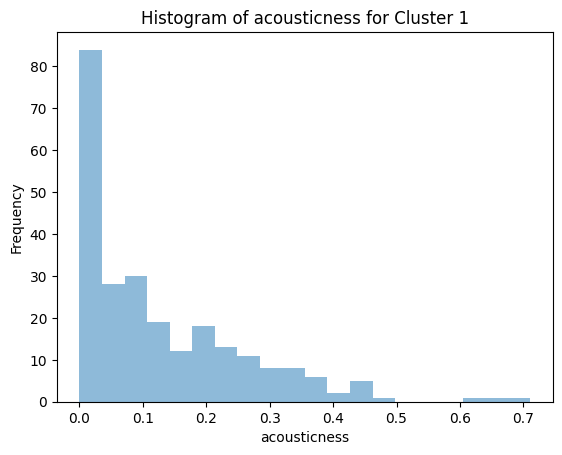

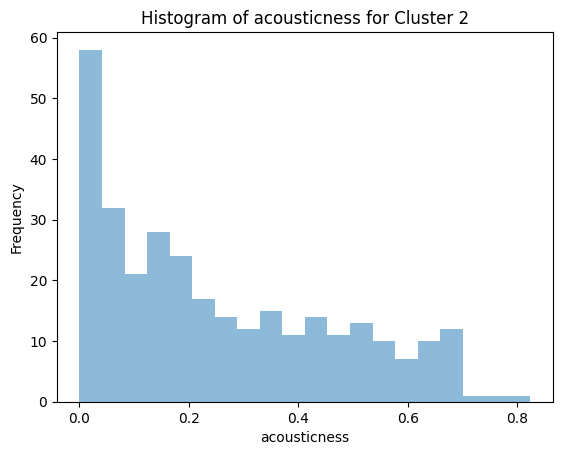

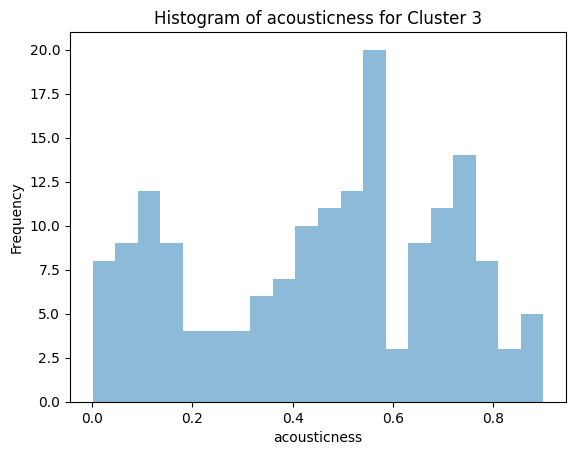

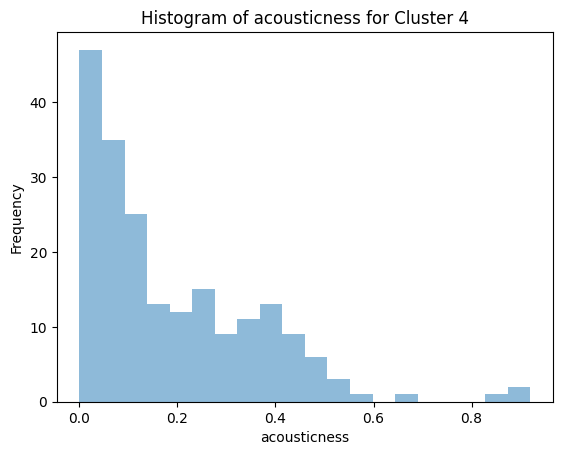

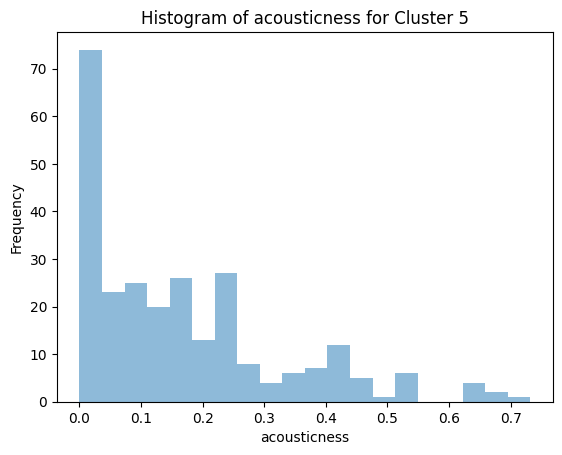

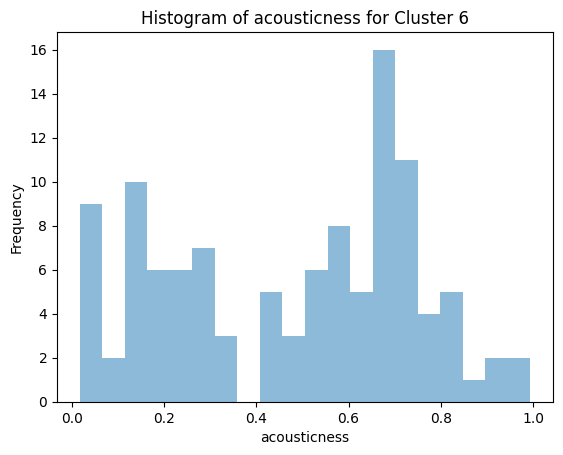

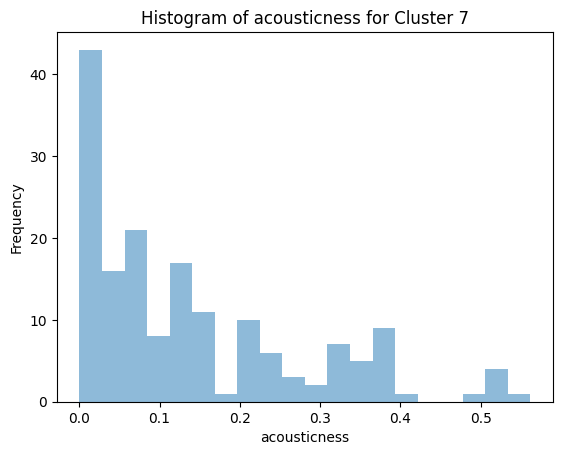

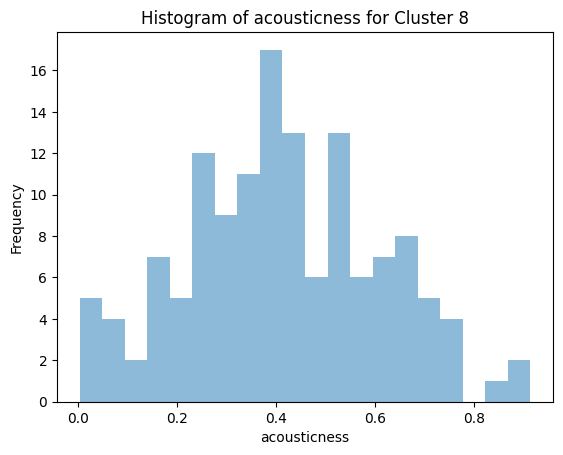

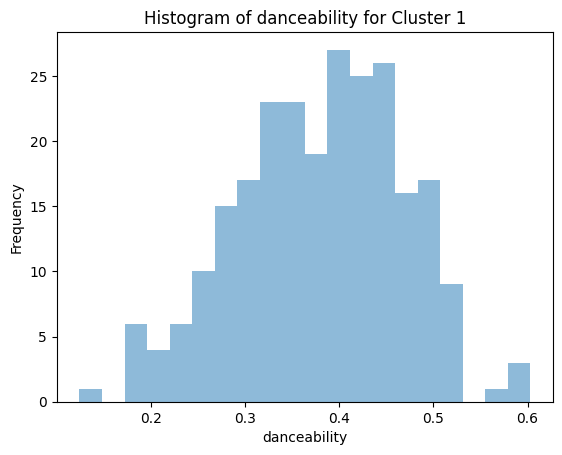

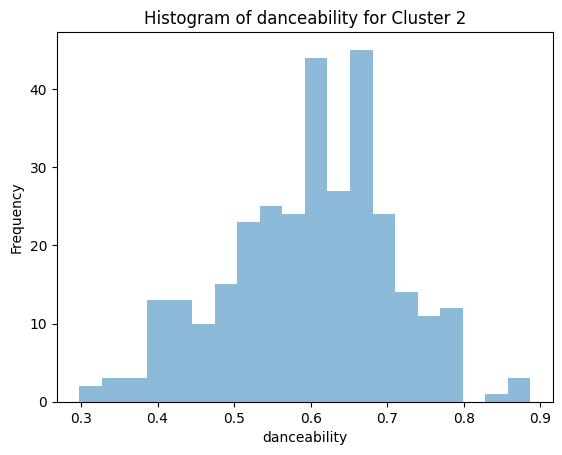

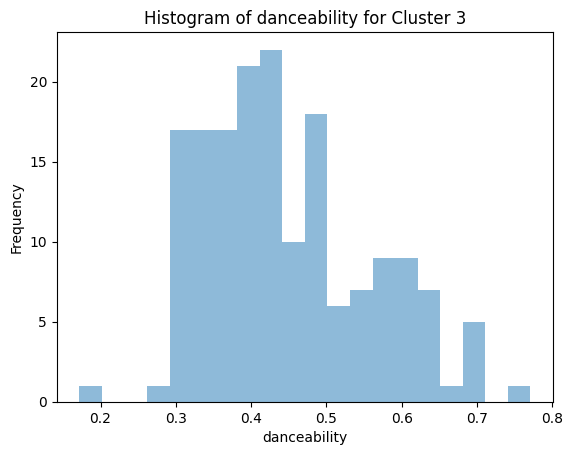

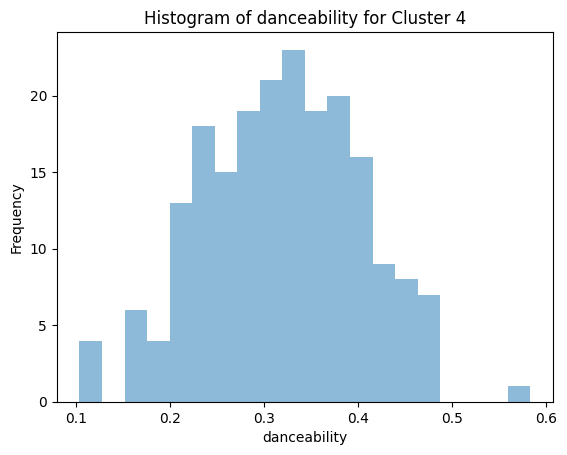

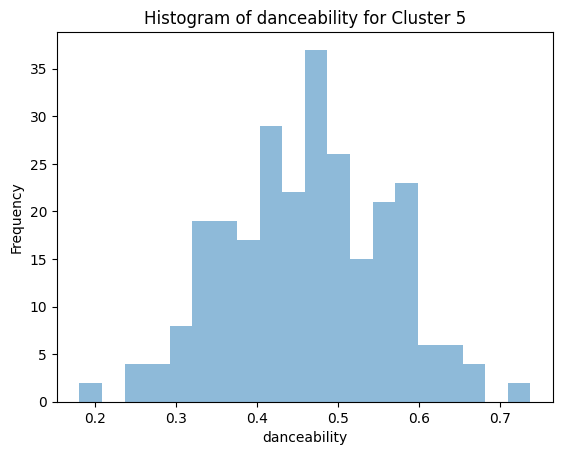

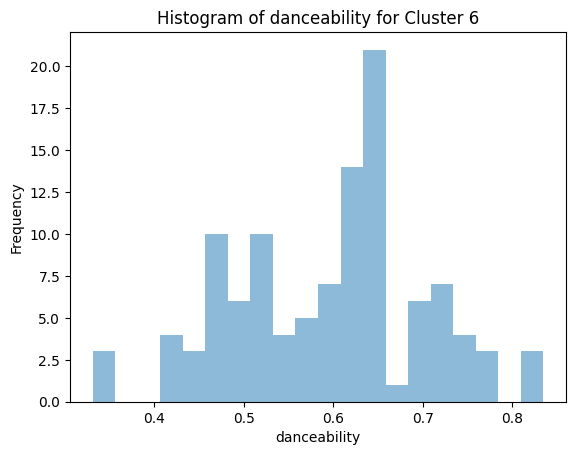

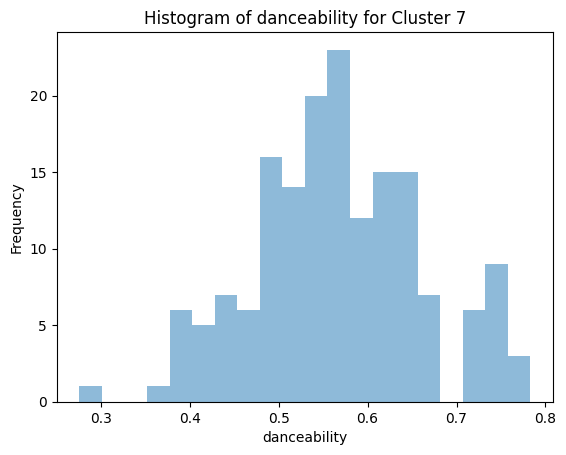

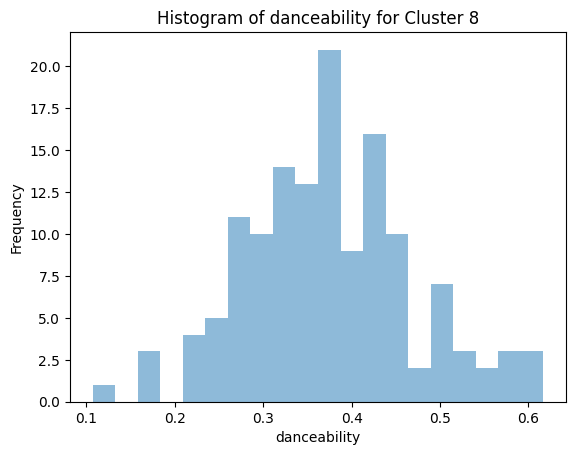

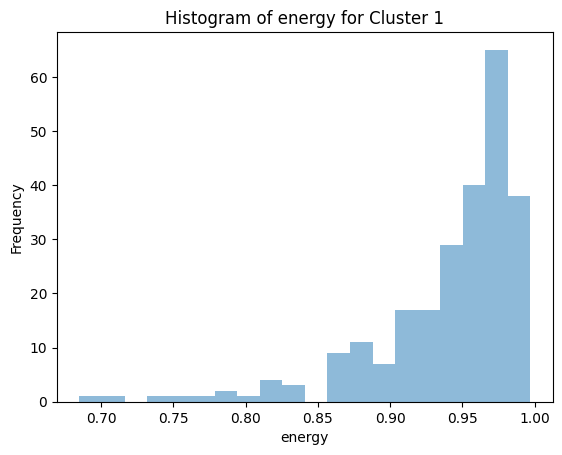

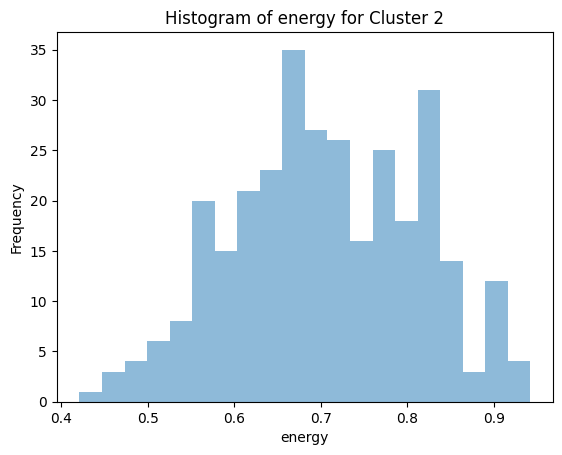

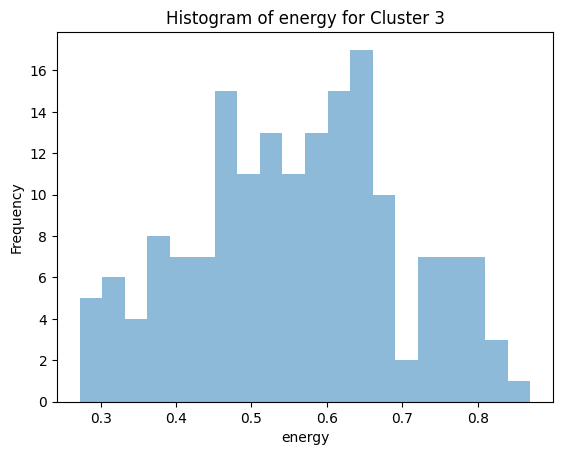

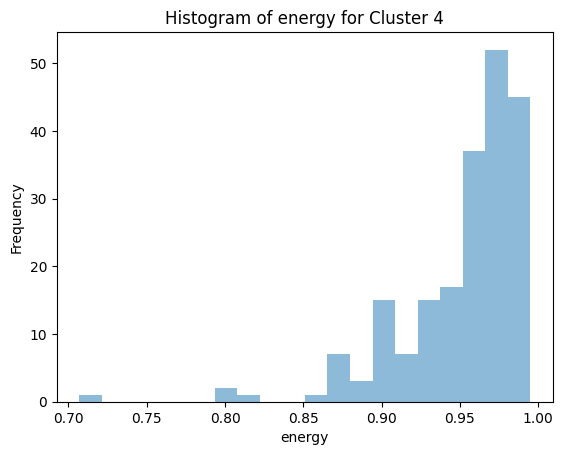

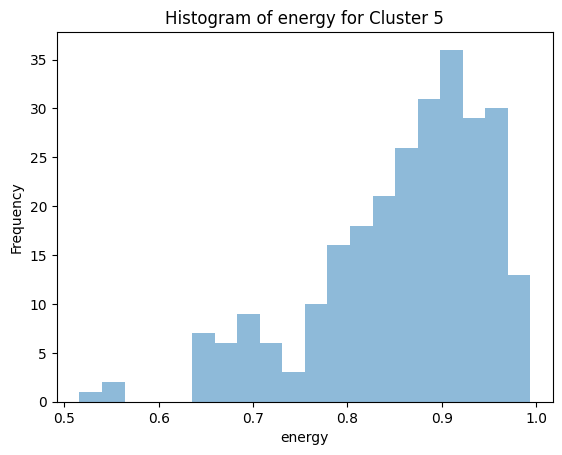

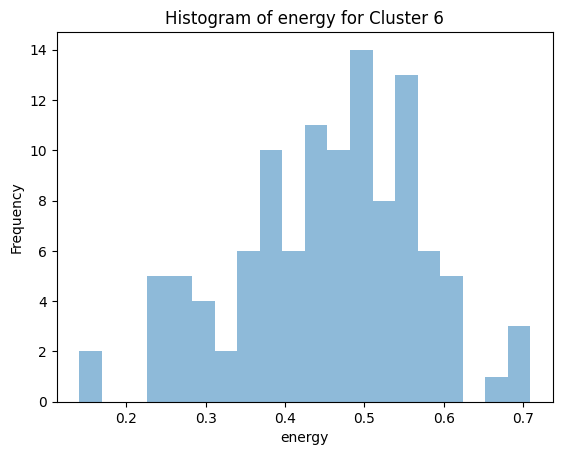

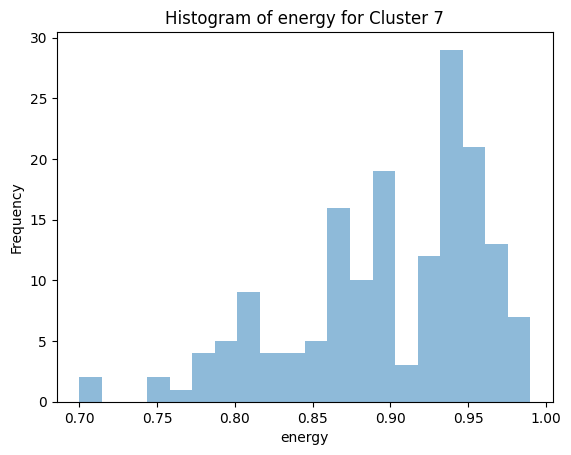

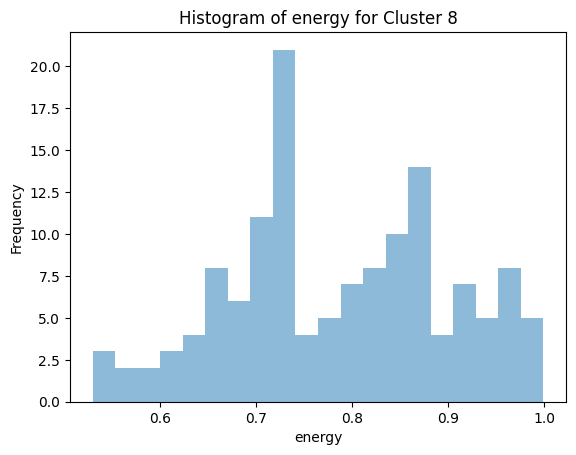

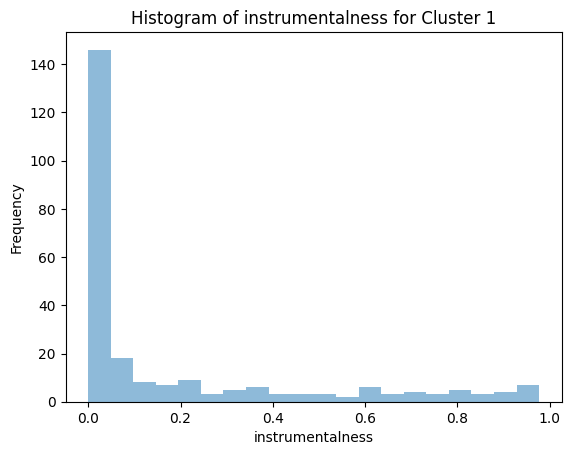

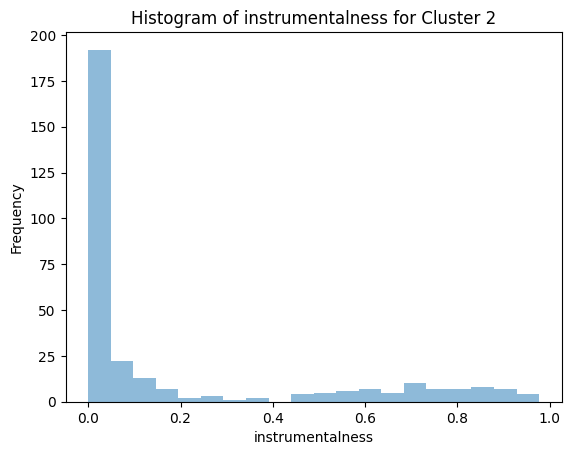

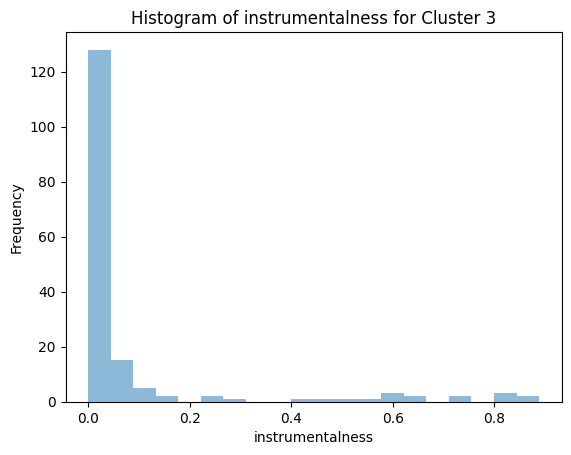

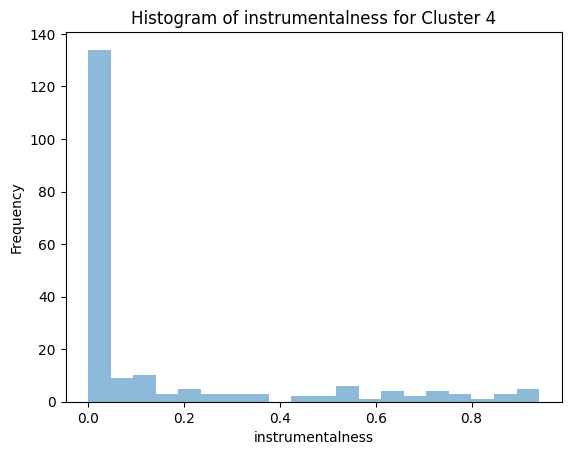

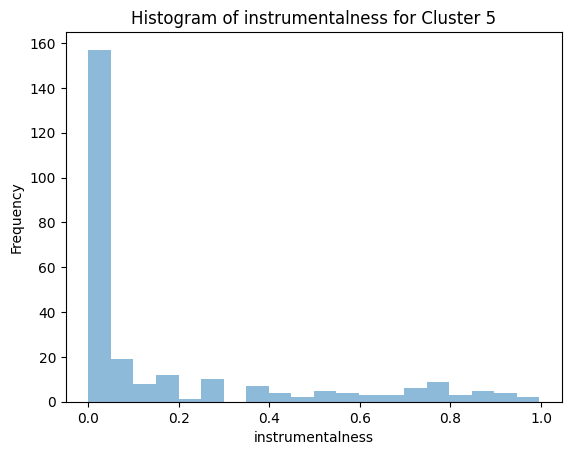

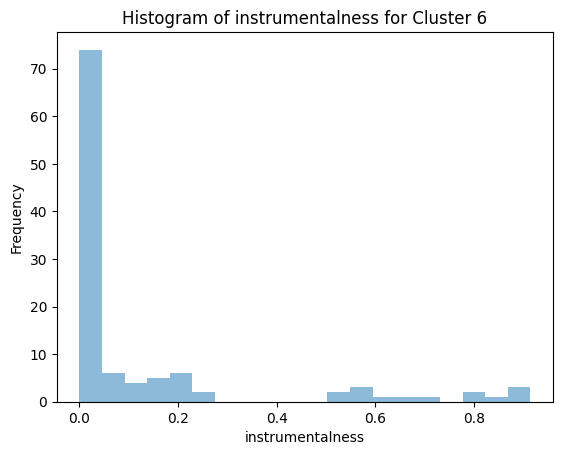

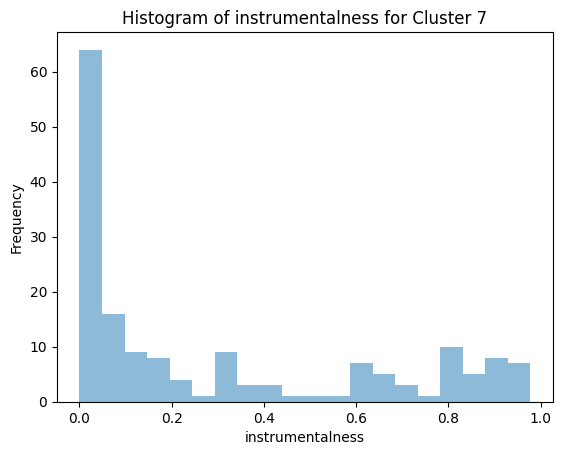

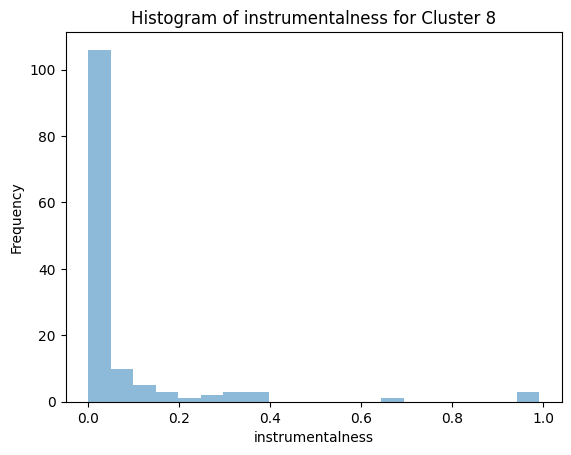

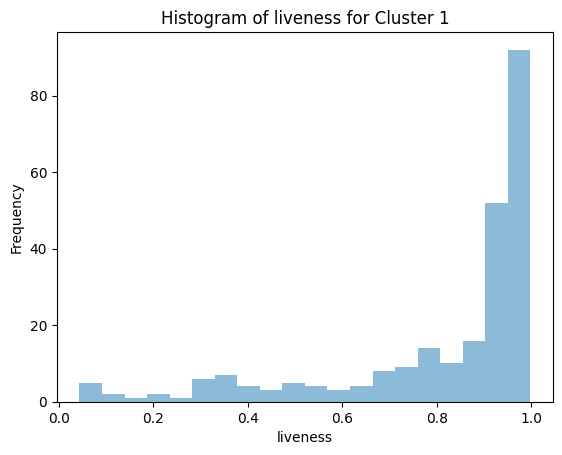

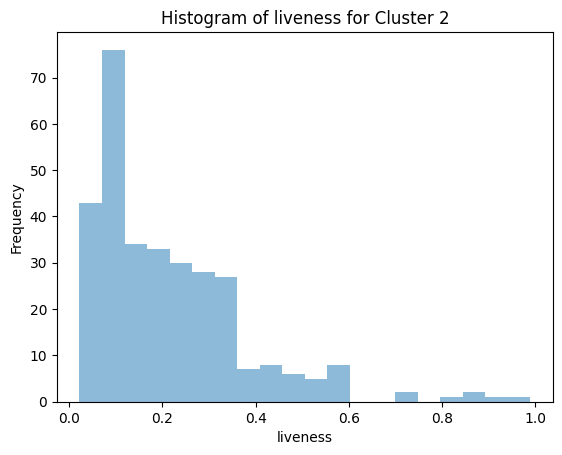

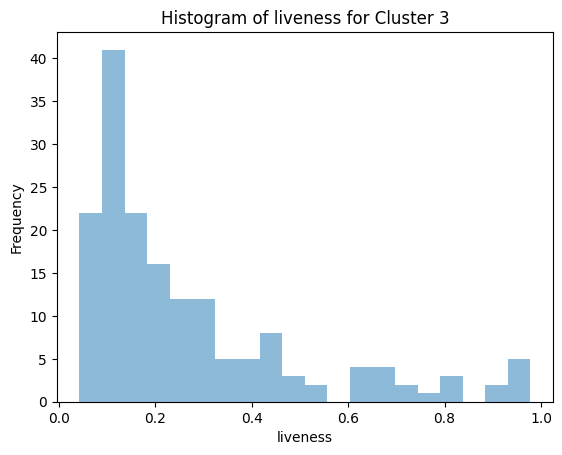

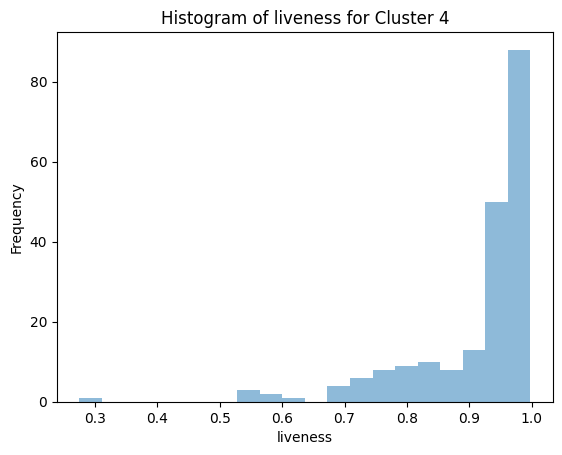

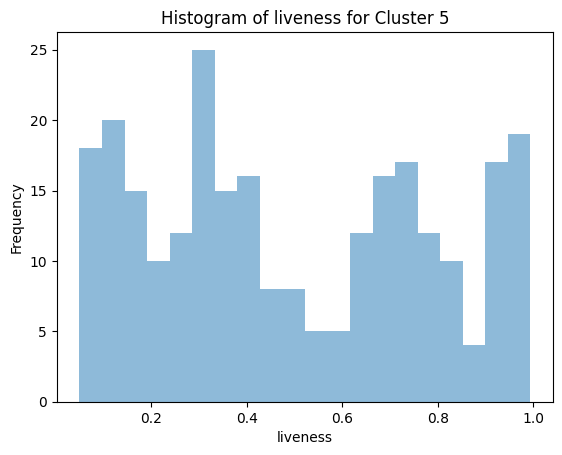

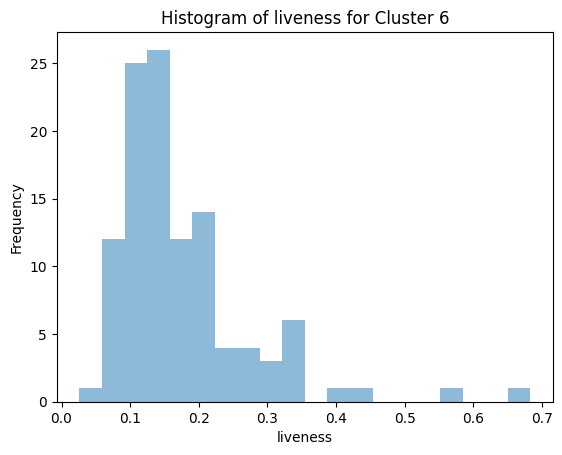

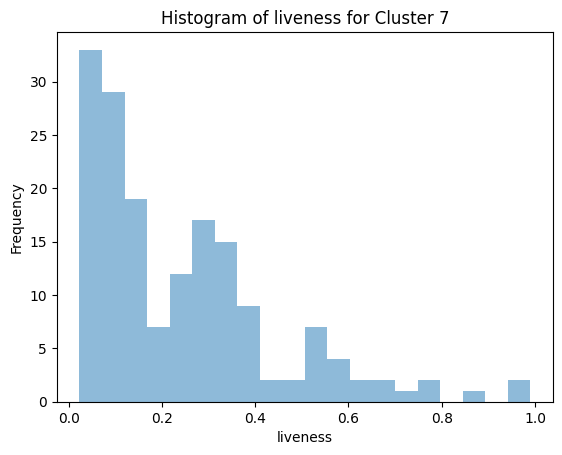

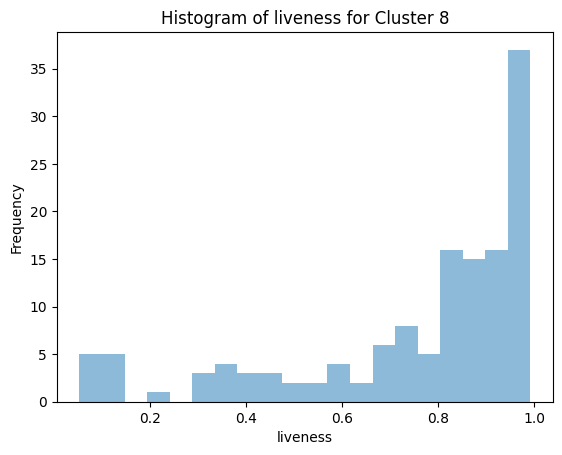

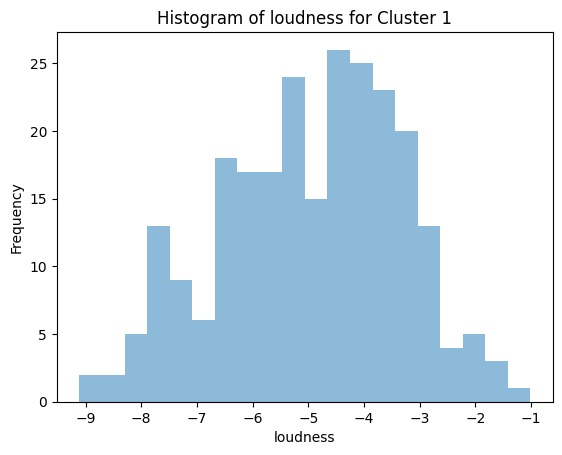

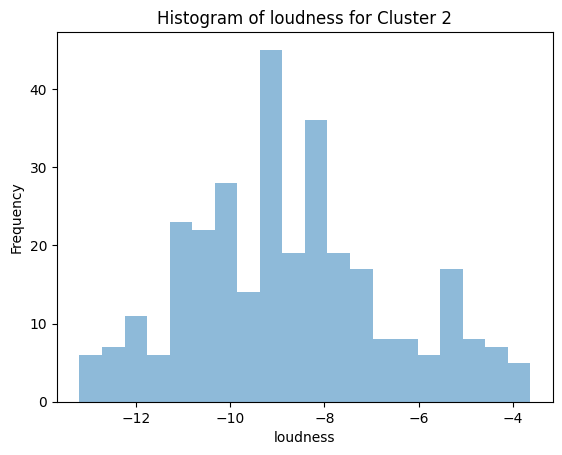

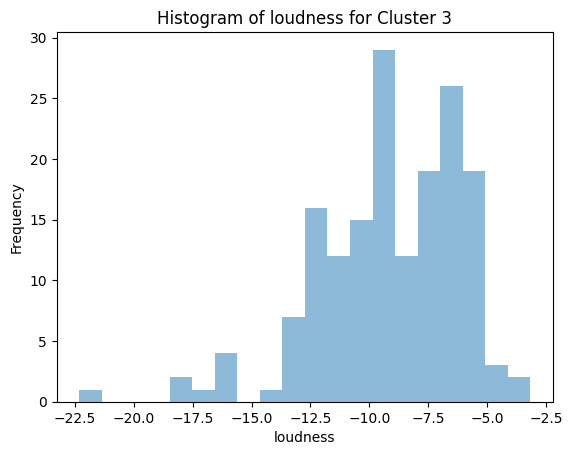

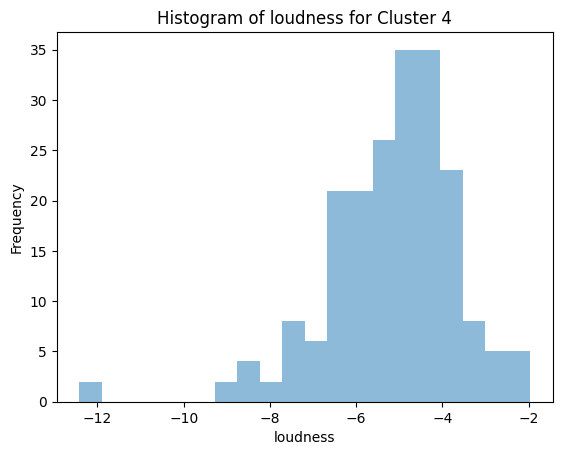

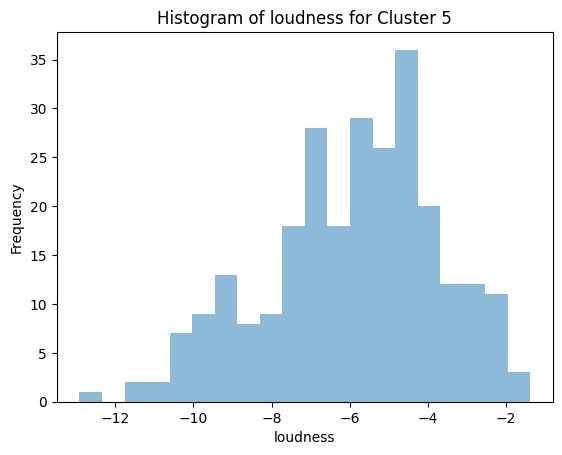

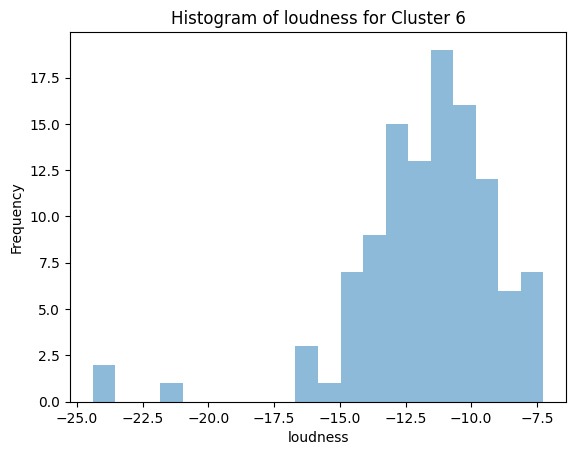

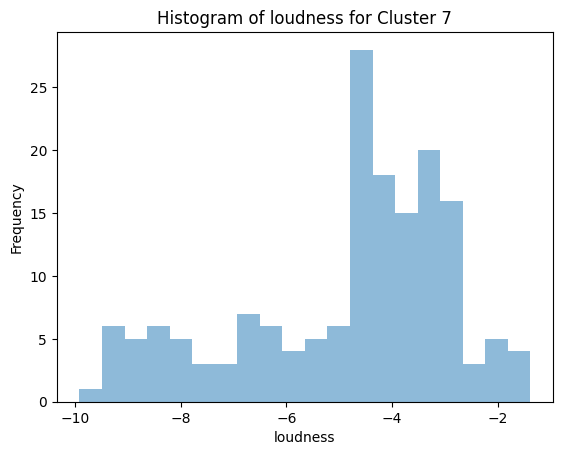

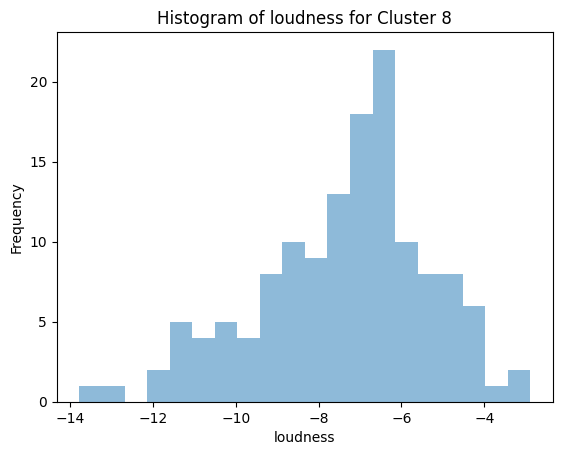

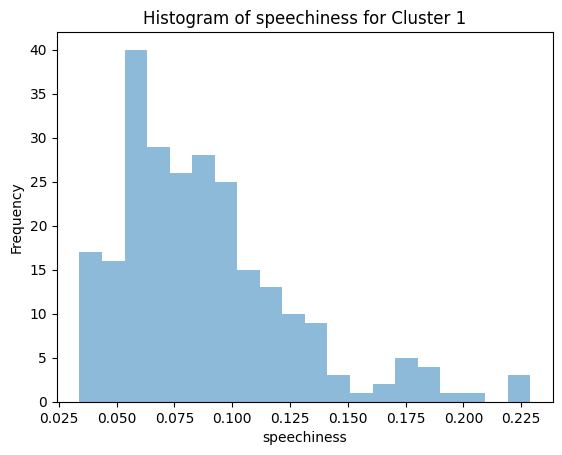

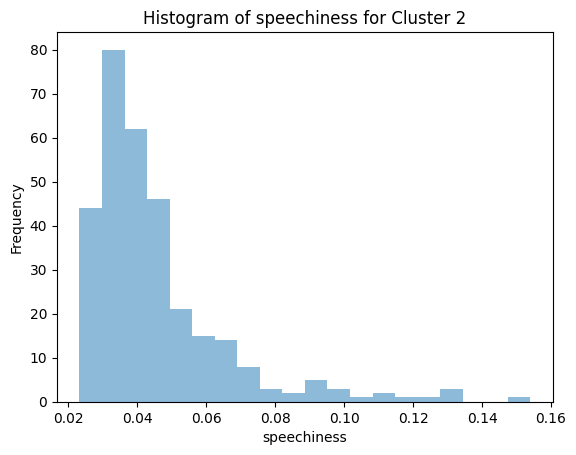

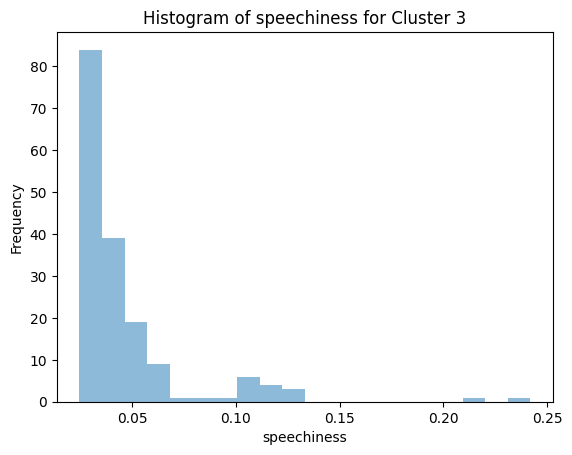

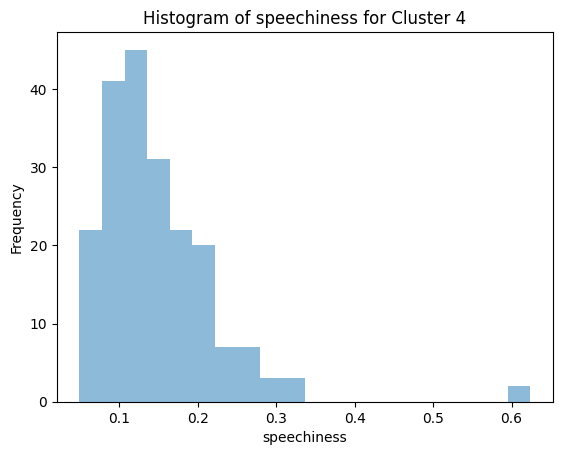

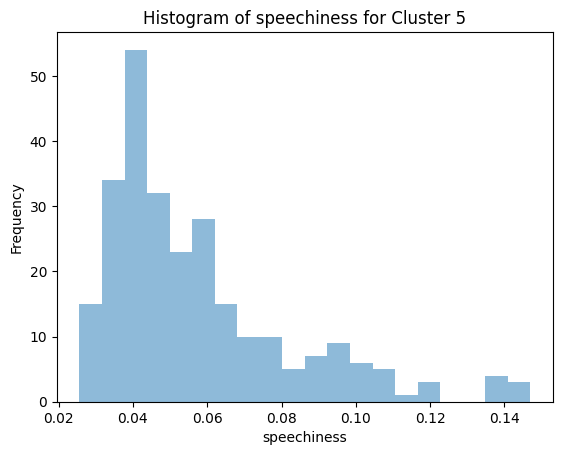

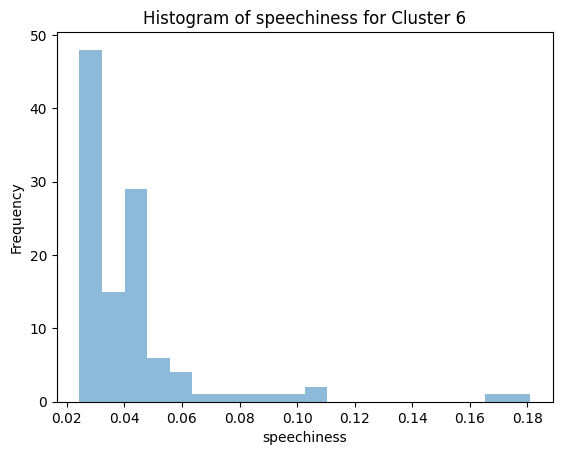

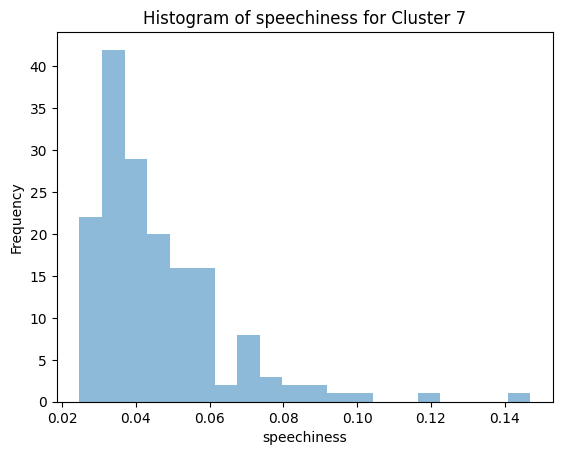

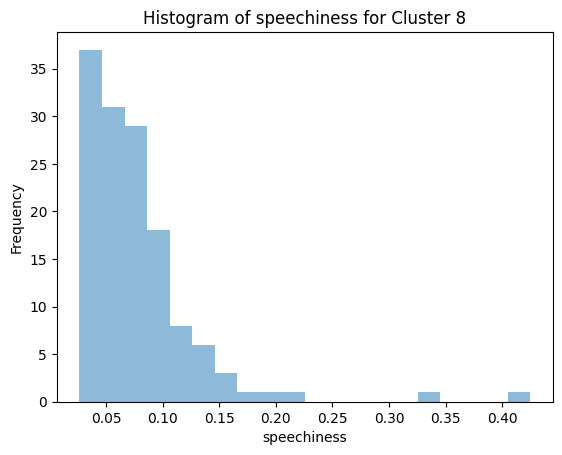

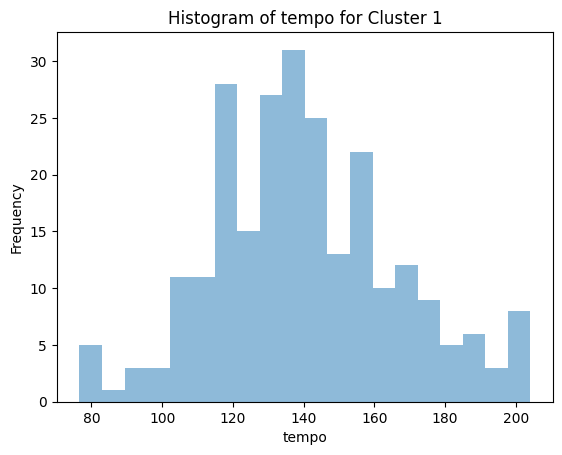

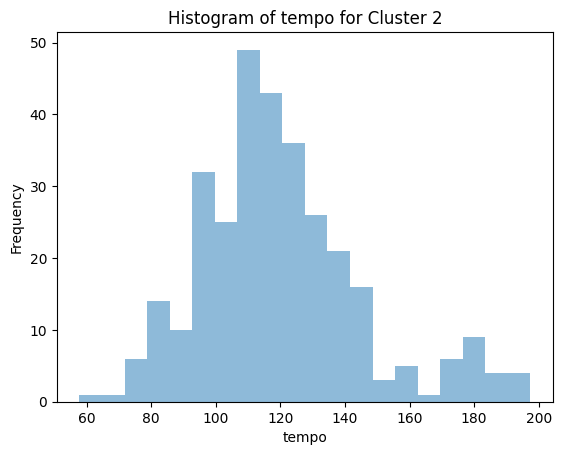

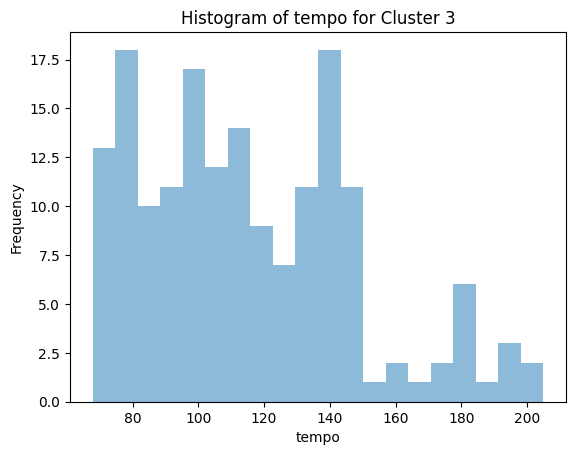

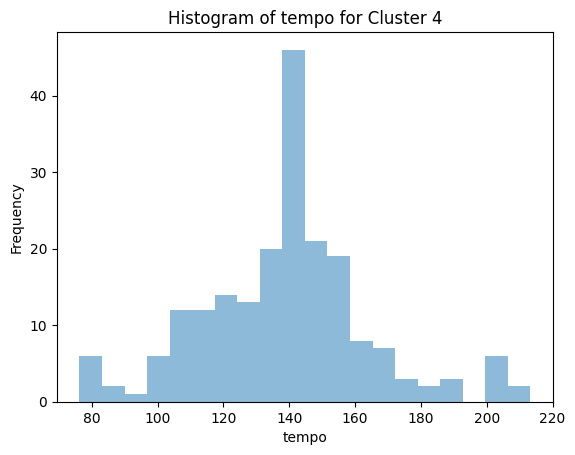

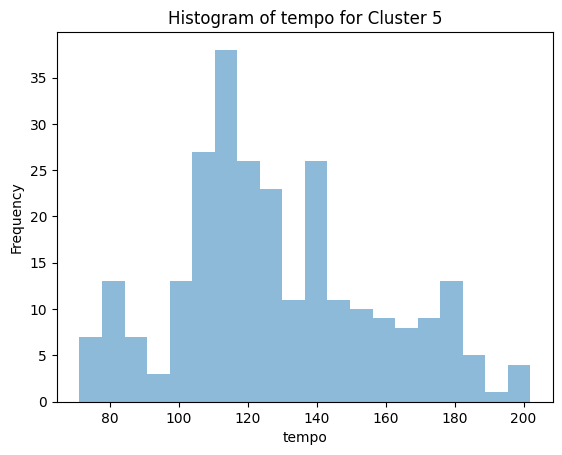

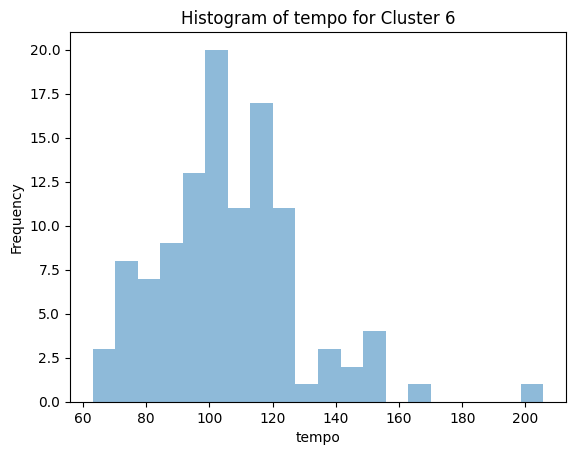

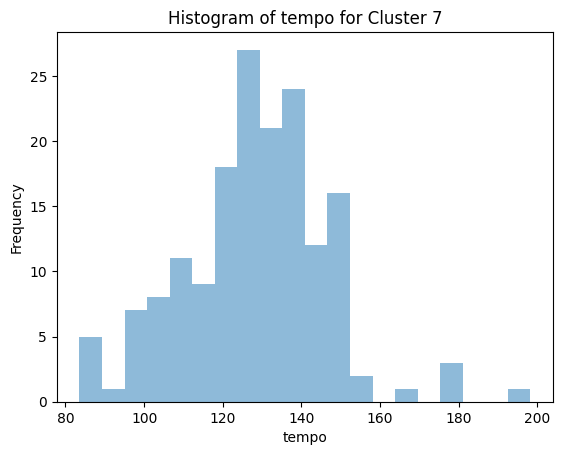

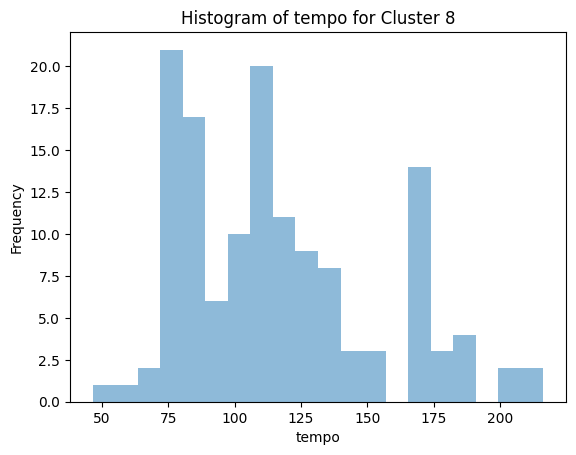

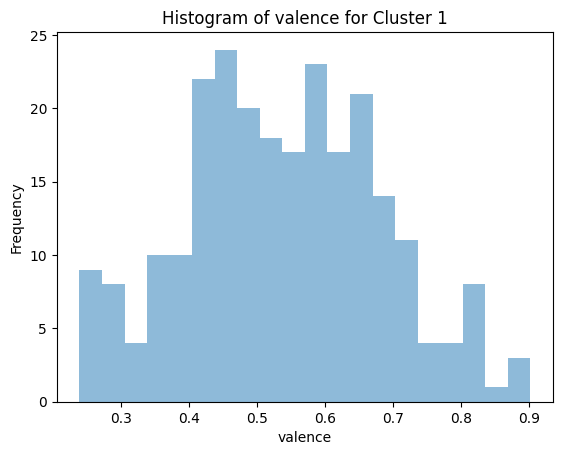

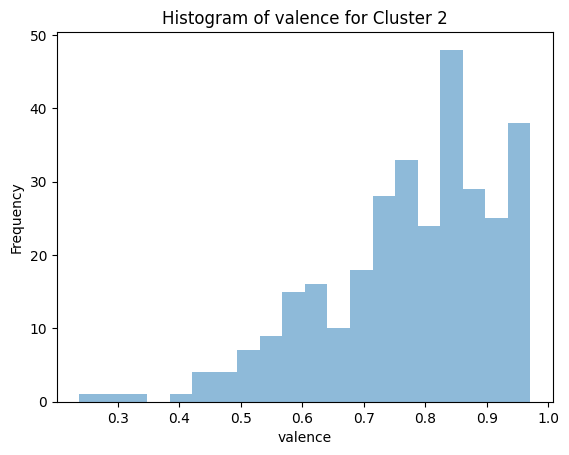

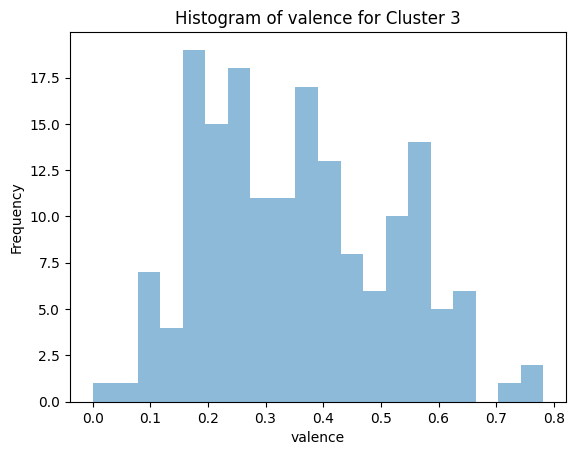

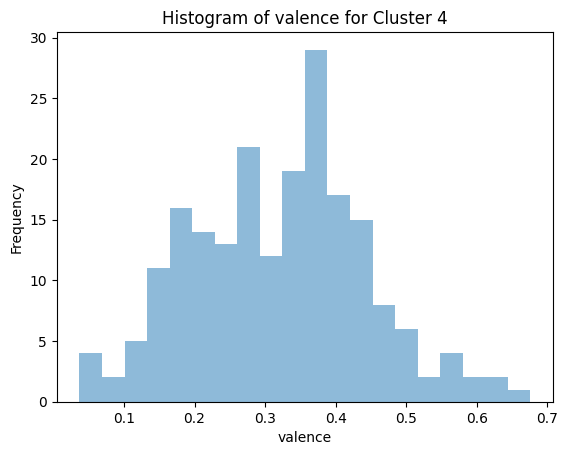

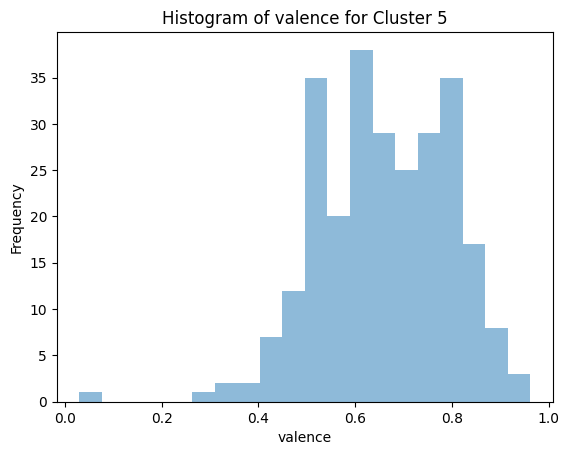

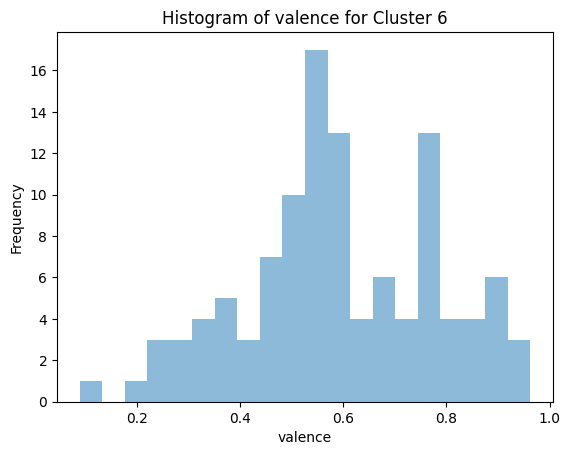

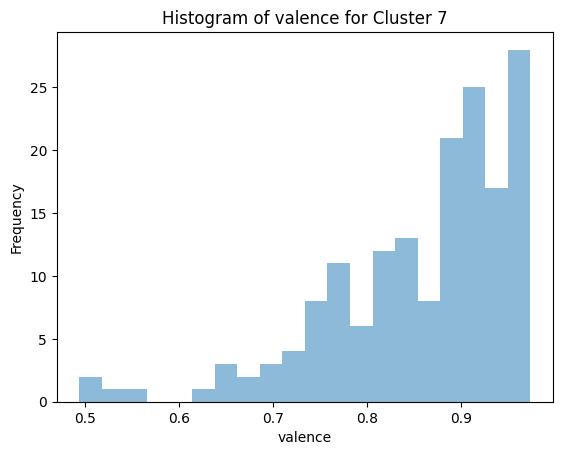

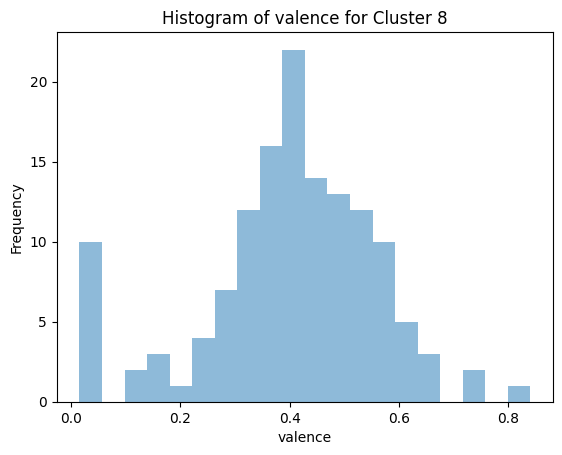

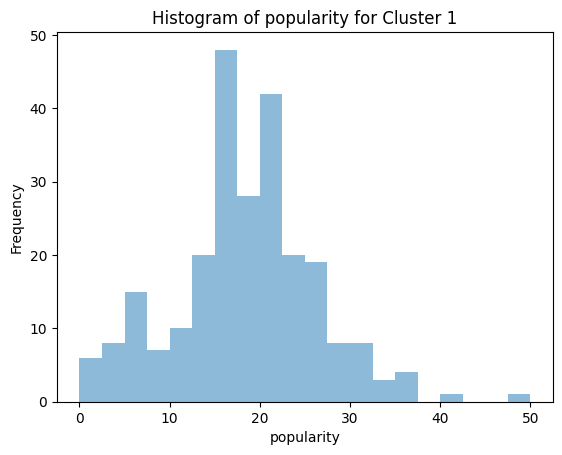

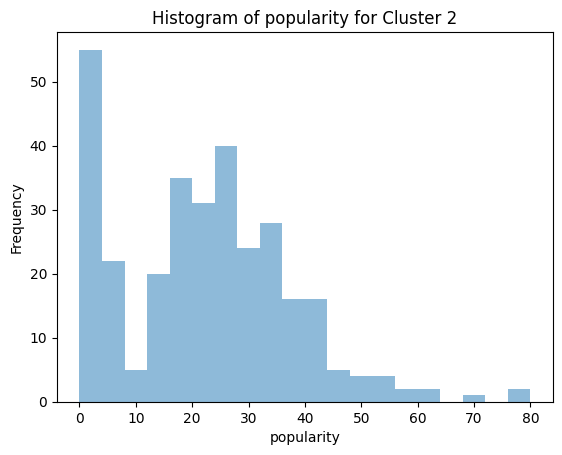

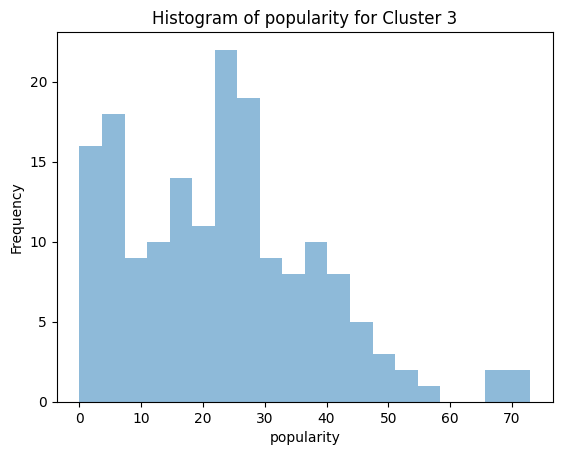

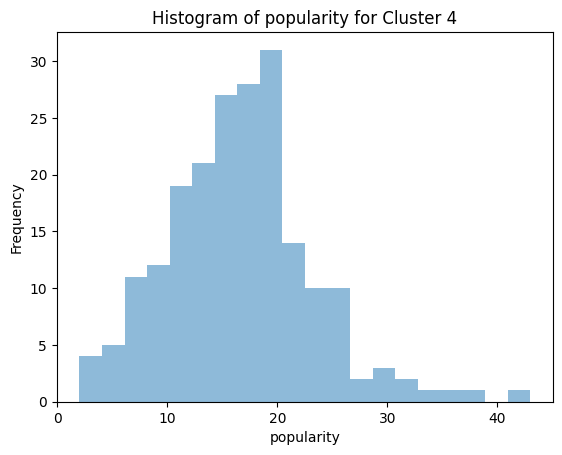

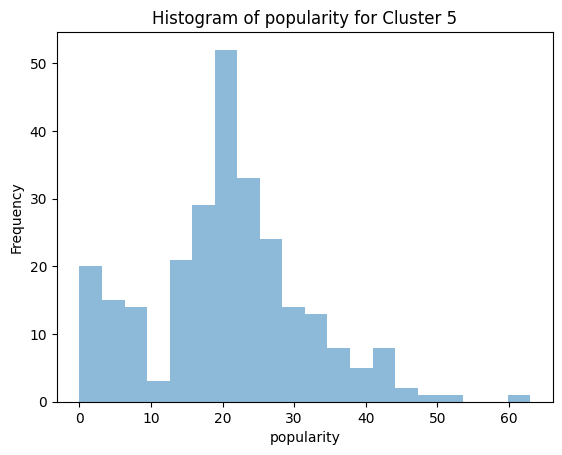

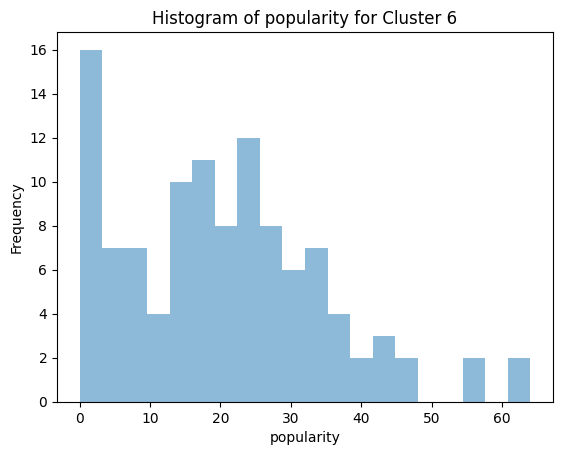

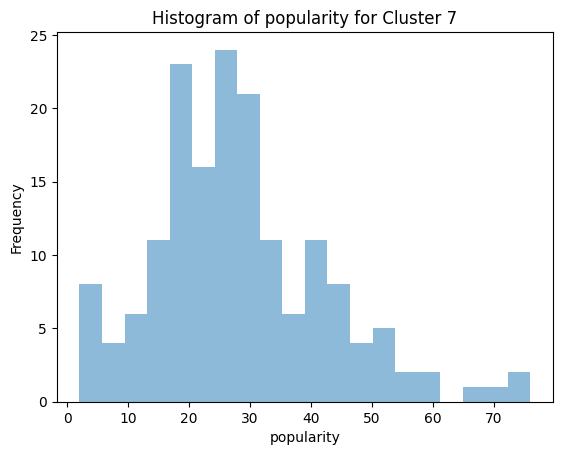

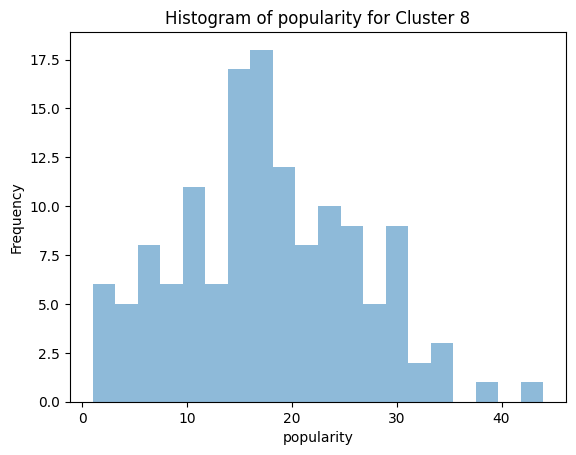

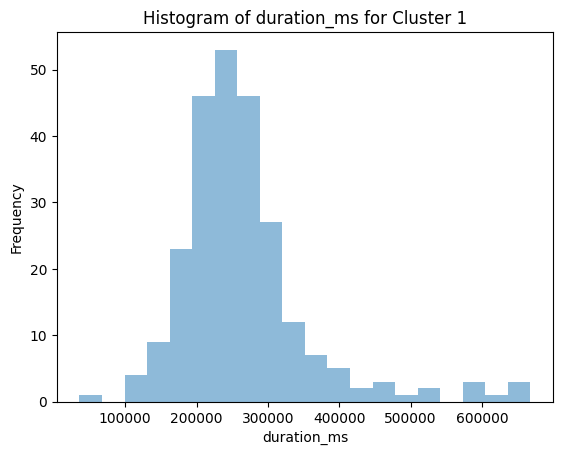

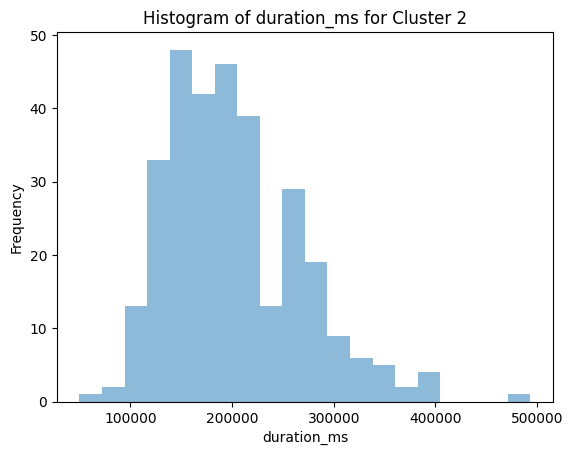

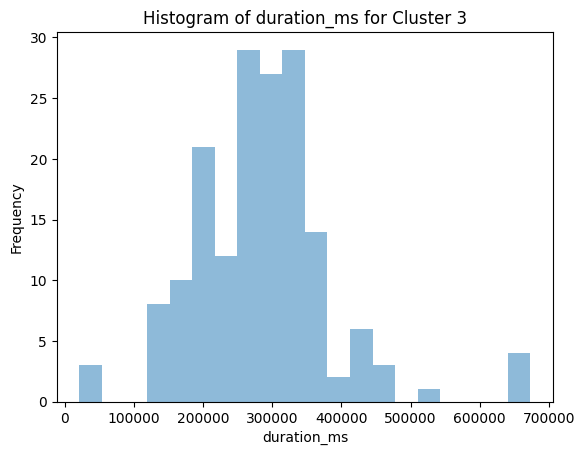

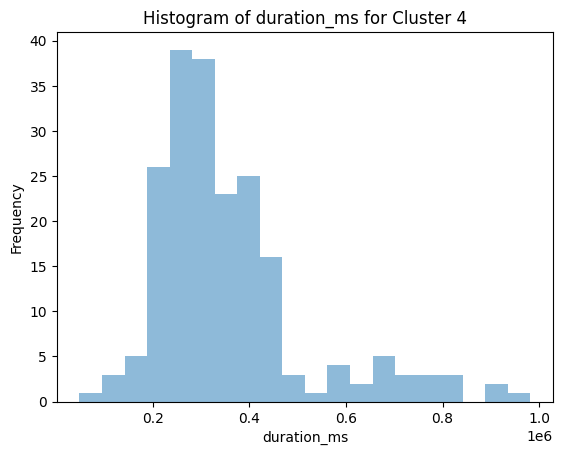

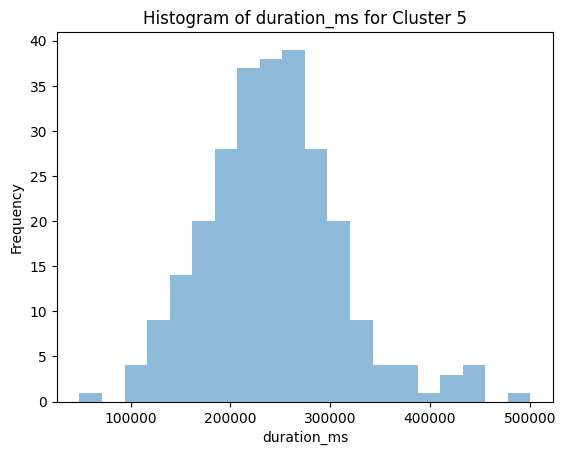

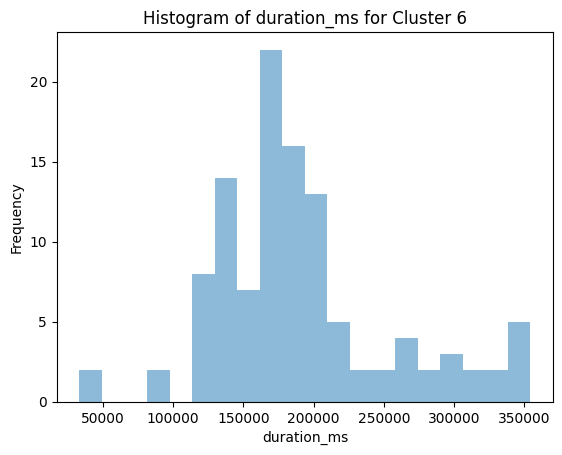

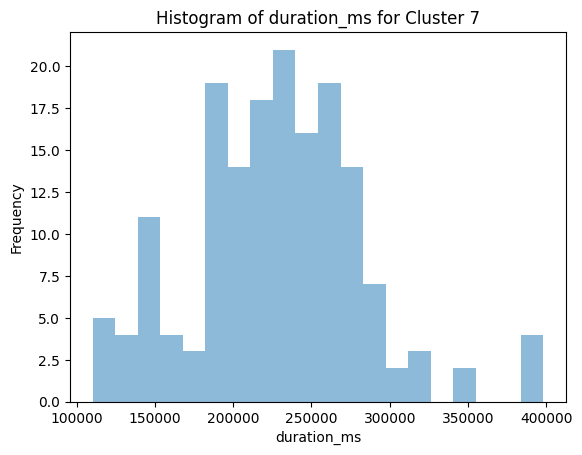

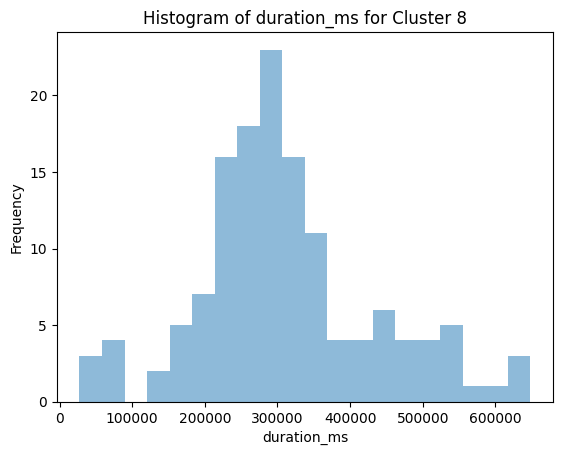

In [38]:
# Plot the various features of each cluster with histplots
selected_columns = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'duration_ms']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

for feature in selected_columns:
    for cluster_label, cluster_data in cluster_groups:
        plt.figure()
        plt.hist(cluster_data[feature], bins=20, alpha=0.5)
        plt.title(f'Histogram of {feature} for Cluster {cluster_label}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

In [39]:
# Created an empty dictionary to store songs for each cluster
clustered_songs = {}

# Iterate over each cluster label
for cluster_label in range(8):
    # Filter songs based on cluster label
    clustered_songs[cluster_label] = df[y_kmeans == cluster_label]

# Now I have a dictionary where each key represents a cluster label and the corresponding value is a DataFrame containing songs in that cluster


In [40]:
# Access the DataFrame for Cluster 1
cluster_1_songs = clustered_songs[0]

cluster_1_songs.loc[:, 'name'] = cluster_1_songs.loc[:, 'name'].astype(str)

# Print the list of songs for Cluster 1
print(cluster_1_songs)


                                                 name  \
2                                  Start Me Up - Live   
7                                 Let It Bleed - Live   
12                                       Happy - Live   
15                  Can't You Hear Me Knocking - Live   
24    All Down The Line - Live At The El Mocambo 1977   
...                                               ...   
1398                    19th Nervous Breakdown - Live   
1400                               I'm Alright - Live   
1402             (I Can't Get No) Satisfaction - Live   
1468                     The Last Time - Mono Version   
1480                     The Last Time - Mono Version   

                               album  release_date  track_number  \
2                 Licked Live In NYC            56             3   
7                 Licked Live In NYC            56             8   
12                Licked Live In NYC            56            13   
15                Licked Live In NYC       

In [41]:
# Access the DataFrame for Cluster 2
cluster_2_songs = clustered_songs[1]

cluster_2_songs.loc[:, 'name'] = cluster_2_songs.loc[:, 'name'].astype(str)

# Print the list of songs for Cluster 2
print(cluster_2_songs)


                                           name                     album  \
30    Crackin’ Up - Live At The El Mocambo 1977    Live At The El Mocambo   
156                                Angie - 2020  Goats Head Soup (Deluxe)   
158                       Hide Your Love - 2020  Goats Head Soup (Deluxe)   
170          Doo Doo Doo Doo Doo (Heartbreaker)  Goats Head Soup (Deluxe)   
233                      Living In A Ghost Town             Honk (Deluxe)   
...                                         ...                       ...   
1602                     Now I've Got A Witness        The Rolling Stones   
1603            Little By Little - Mono Version        The Rolling Stones   
1604                             I'm A King Bee        The Rolling Stones   
1607                        Can I Get A Witness        The Rolling Stones   
1609                            Walking The Dog        The Rolling Stones   

      release_date  track_number                      id   uri  acousticnes

In [42]:
# Access the DataFrame for Cluster 3
cluster_3_songs = clustered_songs[2]

cluster_3_songs.loc[:, 'name'] = cluster_3_songs.loc[:, 'name'].astype(str)

# Print the list of songs for Cluster 1
print(cluster_3_songs)

                                    name                      album  \
54              Heaven - Remastered 2021  Tattoo You (Super Deluxe)   
55    No Use In Crying - Remastered 2021  Tattoo You (Super Deluxe)   
100             Heaven - Remastered 2021                 Tattoo You   
101   No Use In Crying - Remastered 2021                 Tattoo You   
159                        Winter - 2020   Goats Head Soup (Deluxe)   
...                                  ...                        ...   
1531              Mona (I Need You Baby)   The Rolling Stones, Now!   
1541   Time Is On My Side - Mono Version   The Rolling Stones No. 2   
1543                      Grown Up Wrong   The Rolling Stones No. 2   
1550                   Around And Around                     12 x 5   
1559                      Grown Up Wrong                     12 x 5   

      release_date  track_number                      id   uri  acousticness  \
54              54             9  7f1HoWerlIfVpwgsOu0Mib  1533     

In [43]:
# Access the DataFrame for Cluster 4
cluster_4_songs = clustered_songs[3]

cluster_4_songs.loc[:, 'name'] = cluster_4_songs.loc[:, 'name'].astype(str)

# Print the list of songs for Cluster 1
print(cluster_4_songs)

                                                   name  \
3                           If You Can't Rock Me - Live   
4                                     Don’t Stop - Live   
8                               Midnight Rambler - Live   
9                                  Tumbling Dice - Live   
13                                 Gimme Shelter - Live   
...                                                 ...   
1170  Jumpin' Jack Flash - Live At University Of Lee...   
1175  Midnight Rambler - Live At University Of Leeds...   
1176         Bitch - Live At University Of Leeds / 1971   
1181  Street Fighting Man - Live At University Of Le...   
1385                               The Last Time - Live   

                              album  release_date  track_number  \
3                Licked Live In NYC            56             4   
4                Licked Live In NYC            56             5   
8                Licked Live In NYC            56             9   
9                Licked

In [44]:
# Access the DataFrame for Cluster 5
cluster_5_songs = clustered_songs[4]

cluster_5_songs.loc[:, 'name'] = cluster_5_songs.loc[:, 'name'].astype(str)

# Print the list of songs for Cluster 5
print(cluster_5_songs)

                                                   name  \
0                            Concert Intro Music - Live   
23       Honky Tonk Women - Live At The El Mocambo 1977   
25           Hand Of Fate - Live At The El Mocambo 1977   
26               Route 66 - Live At The El Mocambo 1977   
28             Crazy Mama - Live At The El Mocambo 1977   
...                                                 ...   
1514  Everybody Needs Somebody To Love - Version 2 -...   
1526                   Everybody Needs Somebody To Love   
1538    Everybody Needs Somebody To Love - Long Version   
1582                                            Tell Me   
1606                                            Tell Me   

                           album  release_date  track_number  \
0             Licked Live In NYC            56             1   
23        Live At The El Mocambo            55             1   
25        Live At The El Mocambo            55             3   
26        Live At The El Mocambo   

In [45]:
# Access the DataFrame for Cluster 6
cluster_6_songs = clustered_songs[5]

cluster_6_songs.loc[:, 'name'] = cluster_6_songs.loc[:, 'name'].astype(str)

# Print the list of songs for Cluster 6
print(cluster_6_songs)

                                             name  \
154                      Coming Down Again - 2020   
165                    100 Years Ago - Piano Demo   
363     Memphis, Tennessee - Saturday Club / 1963   
372   You Better Move On - Blues In Rhythm / 1964   
381     Memphis, Tennessee - Saturday Club / 1963   
...                                           ...   
1584                   You Can Make It If You Try   
1589                                  Honest I Do   
1596                   You Can Make It If You Try   
1600                                  Honest I Do   
1608                   You Can Make It If You Try   

                            album  release_date  track_number  \
154      Goats Head Soup (Deluxe)            51             3   
165      Goats Head Soup (Deluxe)            51             4   
363                        On Air            45             8   
372                        On Air            45            17   
381               On Air (Deluxe)     

In [46]:
# Access the DataFrame for Cluster 7
cluster_7_songs = clustered_songs[6]

cluster_7_songs.loc[:, 'name'] = cluster_7_songs.loc[:, 'name'].astype(str)

# Print the list of songs for Cluster 7
print(cluster_7_songs)

                                   name                           album  \
46        Start Me Up - Remastered 2021       Tattoo You (Super Deluxe)   
47          Hang Fire - Remastered 2021       Tattoo You (Super Deluxe)   
48              Slave - Remastered 2021       Tattoo You (Super Deluxe)   
50    Black Limousine - Remastered 2021       Tattoo You (Super Deluxe)   
57          Living In The Heart Of Love       Tattoo You (Super Deluxe)   
...                                 ...                             ...   
1489     One More Try - Remastered 2002  Out Of Our Heads (US Sequence)   
1504       Hitch Hike - Remastered 2002           Out Of Our Heads (UK)   
1537                 Surprise, Surprise        The Rolling Stones, Now!   
1581                              Carol      England’s Newest Hitmakers   
1605                              Carol              The Rolling Stones   

      release_date  track_number                      id   uri  acousticness  \
46              54 

In [47]:
# Access the DataFrame for Cluster 8
cluster_8_songs = clustered_songs[7]

cluster_8_songs.loc[:, 'name'] = cluster_8_songs.loc[:, 'name'].astype(str)

# Print the list of songs for Cluster 8
print(cluster_8_songs)

                                                 name  \
1                          Street Fighting Man - Live   
5                                   Monkey Man - Live   
6                                        Angie - Live   
10                          Band Introductions - Live   
11                               Thru And Thru - Live   
...                                               ...   
1395             I've Been Loving You Too Long - Live   
1399                        Time Is On My Side - Live   
1553                               Time Is On My Side   
1565  Time Is On My Side - Mono Version / Organ Intro   
1594            Tell Me - Full Version / Mono Version   

                            album  release_date  track_number  \
1              Licked Live In NYC            56             2   
5              Licked Live In NYC            56             6   
6              Licked Live In NYC            56             7   
10             Licked Live In NYC            56        

## Observations:

Cluster 1, consisting of 248 songs, exhibits histograms depicting a somewhat normal distribution of popularity, primarily lower levels of acousticness, mostly normal distribution of danceability, predominantly higher levels of energy, low levels of instrumentalness, higher levels of liveliness, a normal distribution of loudness, lower levels of speechiness, a normal distribution of tempo, a somewhat normal distribution of valence, and moderate levels of duration.

Cluster 2, comprising 312 songs, showcases histograms revealing moderate to lower levels of popularity, moderate levels of acousticness, mostly normal distribution of danceability, normal distribution of energy, low levels of instrumentalness, predominantly lower levels of liveliness, a somewhat normal distribution of loudness, lower levels of speechiness, a normal distribution of tempo, higher levels of valence, and moderate levels of duration.

Cluster 3, with 169 songs, displays histograms depicting lower levels of popularity, no discernible pattern of acousticness, a somewhat normal distribution of danceability, normal distribution of energy, low levels of instrumentalness, somewhat higher levels of loudness, very low levels of speechiness, no discernible pattern for tempo, no discernible pattern for valence, and moderate levels of duration.

Cluster 4, consisting of 203 songs, demonstrates histograms showing lower levels of popularity, predominantly low levels of acousticness, mostly normal distribution of danceability, predominantly higher levels of energy, low levels of instrumentalness, higher levels of liveliness, somewhat higher levels of loudness, very low levels of speechiness, no discernible pattern for tempo, a somewhat normal distribution of valence, and moderate levels of duration.

Cluster 5, comprising 264 songs, reveals histograms indicating moderate levels of popularity, predominantly low levels of acousticness, mostly normal distribution of danceability, somewhat higher levels of energy, low levels of instrumentalness, no discernible pattern for liveliness, mostly normal distribution of loudness, mostly low levels of speechiness, no discernible pattern for tempo, higher levels of valence, and moderate levels of duration.

Cluster 6, with 111 songs, illustrates histograms showing no discernible pattern for popularity, no distinguishing pattern of acousticness, mostly low levels of danceability, a fairly normal distribution of energy, low levels of instrumentalness, mostly lower levels of liveliness, higher levels of loudness, very low levels of speechiness, mostly lower levels of tempo, no discernible patterns for valence, and moderate levels of duration.

Cluster 7, consisting of 166 songs, presents histograms indicating moderate levels of popularity, predominantly low levels of acousticness, mostly normal distribution of danceability, no discernible pattern for energy, low levels of instrumentalness, mostly lower levels of liveliness, no discernible pattern for loudness, very low levels of speechiness, a somewhat normal distribution of tempo, higher levels of valence, and moderate levels of duration.

Cluster 8, comprising 137 songs, showcases histograms revealing lower levels of popularity, a normal distribution of acousticness, mostly normal distribution of danceability, no discernible pattern for energy, low levels of instrumentalness, higher levels of liveliness, a somewhat normal distribution of loudness, very low levels of speechiness, no discernible pattern for tempo, a somewhat normal distribution of valence, and moderate levels of duration.